# Team
Aaron Wong - A92048617 - Data Cleaning/Analysis/Consolidation
<br>
Kevin Ramos - A12884910 - Data Cleaning/Analysis
<br>
Rajiv Sancheti - A13602097 - Data Visualization/Write-Up
<br>
Rachel Reyes - A13736589 - Data Visualization/Write-Up/Analysis
<br>
Jonathan Wells - A14733230 - Statistical Analysis/Cleaning
<br>
Anmol Arora - A13939947 - Data Visualization/Write-Up/Analysis

# Introduction and Background
__Description:__ 

__Research Question:__

__Hypothesis:__



# Data Description




Here are the packages we imported to allow our code to work.

In [48]:
import nba_py
import pandas as pd

from nba_py import game, player, constants, team, _api_scrape, _get_json
from nba_py.player import PlayerList, PlayerCareer
from nba_py.league import PlayerStats, TeamStats
#from nba_py.league import TeamStats
from nba_py.team import TeamCommonRoster

%matplotlib inline
from scipy import stats
from scipy.stats import kstest, normaltest

import scipy
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [49]:
#For some reason, TeamStats from nba_py.league doesn't work, so we need to import the code here
class TeamStats:
    _endpoint = 'leaguedashteamstats'

    def __init__(self,
                 conference=constants.Conference.Default,
                 date_from=constants.DateFrom.Default,
                 date_to=constants.DateTo.Default,
                 division=constants.Division.Default,
                 game_scope=constants.Game_Scope.Default,
                 game_segment=constants.GameSegment.Default,
                 last_n_games=constants.LastNGames.Default,
                 league_id=constants.League.Default,
                 location=constants.Location.Default,
                 measure_type=constants.MeasureType.Default,
                 month=constants.Month.Default,
                 opponent_team_id=constants.OpponentTeamID.Default,
                 outcome=constants.Outcome.Default,
                 playoff_round=constants.PlayoffRound.Default,
                 pace_adjust=constants.PaceAdjust.Default,
                 per_mode=constants.PerMode.Default,
                 period=constants.Period.Default,
                 player_experience=constants.PlayerExperience.Default,
                 player_position=constants.PlayerPosition.Default,
                 plus_minus=constants.PlusMinus.Default,
                 rank=constants.Rank.Default,
                 season=constants.CURRENT_SEASON,
                 season_segment=constants.SeasonSegment.Default,
                 season_type=constants.SeasonType.Default,
                 shot_clock_range=constants.ShotClockRange.Default,
                 starter_bench=constants.StarterBench.Default,
                 team_id=constants.TeamID.Default,
                 vs_conference=constants.VsConference.Default,
                 vs_division=constants.VsDivision.Default
                 ):
        self.json = _get_json(endpoint=self._endpoint,
                              params={'LeagueID': league_id,
                                      'SeasonType': season_type,
                                      'MeasureType': measure_type,
                                      'PerMode': per_mode,
                                      'PlusMinus': plus_minus,
                                      'PaceAdjust': pace_adjust,
                                      'Rank': rank,
                                      'Season': season,
                                      'PORound': playoff_round,
                                      'Outcome': outcome,
                                      'Location': location,
                                      'Month': month,
                                      'SeasonSegment': season_segment,
                                      'DateFrom': date_from,
                                      'DateTo': date_to,
                                      'OpponentTeamID': opponent_team_id,
                                      'VsConference': vs_conference,
                                      'VsDivision': vs_division,
                                      'TeamID': team_id,
                                      'Conference': conference,
                                      'Division': division,
                                      'GameSegment': game_segment,
                                      'Period': period,
                                      'ShotClockRange': shot_clock_range,
                                      'LastNGames': last_n_games,
                                      'GameScope': game_scope,
                                      'PlayerExperience': player_experience,
                                      'PlayerPosition': player_position,
                                      'StarterBench': starter_bench,
                                      })

    def overall(self):
        return _api_scrape(self.json, 0)

In [50]:
# Get every player from 2000-2001 to 2016-2017
# We break everything into each year since it will be easier to scrape data from the web that way

df_players2000 = PlayerStats(season ='2000-01')

# We did this for all the players in every season up until 2016-2017.

In [51]:
df_players2001 = PlayerStats(season ='2001-02')

In [52]:
df_players2002 = PlayerStats(season ='2002-03')

In [53]:
df_players2003 = PlayerStats(season ='2003-04')

In [54]:
df_players2004 = PlayerStats(season ='2004-05')

In [55]:
df_players2005 = PlayerStats(season ='2005-06')

In [56]:
df_players2006 = PlayerStats(season ='2006-07')

In [57]:
df_players2007 = PlayerStats(season ='2007-08')

In [58]:
df_players2008 = PlayerStats(season ='2008-09')

In [59]:
df_players2009 = PlayerStats(season ='2009-10')

In [60]:
df_players2010 = PlayerStats(season ='2010-11')

In [61]:
df_players2011 = PlayerStats(season ='2011-12')

In [62]:
df_players2012 = PlayerStats(season ='2012-13')

In [63]:
df_players2013 = PlayerStats(season ='2013-14')

In [64]:
df_players2014 = PlayerStats(season ='2014-15')

In [65]:
df_players2015 = PlayerStats(season ='2015-16')

In [66]:
df_players2016 = PlayerStats(season ='2016-17')

In [75]:
#Now let's import every single roster from every year. We hard coded this since we data for every team for every year
#individually

#2000 rosters for all the teams
df_Hawks2000 = TeamCommonRoster(team_id = '1610612737', season = '2000-01')
df_Celtics2000 = TeamCommonRoster(team_id = '1610612738', season = '2000-01')
df_Nets2000 = TeamCommonRoster(team_id = '1610612751', season = '2000-01')
df_Hornets2000 = TeamCommonRoster(team_id = '1610612766', season = '2000-01')
df_Bulls2000 = TeamCommonRoster(team_id = '1610612741', season = '2000-01')
df_Cavaliers2000 = TeamCommonRoster(team_id = '1610612739', season = '2000-01')
df_Mavericks2000 = TeamCommonRoster(team_id = '1610612742', season = '2000-01')
df_Nuggets2000 = TeamCommonRoster(team_id = '1610612743', season = '2000-01')
df_Pistons2000 = TeamCommonRoster(team_id = '1610612765', season = '2000-01')
df_Warriors2000 = TeamCommonRoster(team_id = '1610612744', season = '2000-01')
df_Rockets2000 = TeamCommonRoster(team_id = '1610612745', season = '2000-01')
df_Pacers2000 = TeamCommonRoster(team_id = '1610612754', season = '2000-01')
df_Clippers2000 = TeamCommonRoster(team_id = '1610612746', season = '2000-01')
df_Clippers2000 = TeamCommonRoster(team_id = '1610612746', season = '2000-01')
df_Lakers2000 = TeamCommonRoster(team_id = '1610612747', season = '2000-01')
df_Heat2000 = TeamCommonRoster(team_id = '1610612748', season = '2000-01')
df_Bucks2000 = TeamCommonRoster(team_id = '1610612749', season = '2000-01')
df_Timberwolves2000 = TeamCommonRoster(team_id = '1610612750', season = '2000-01')
df_Pelicans2000 = TeamCommonRoster(team_id = '1610612740', season = '2000-01')
df_Knicks2000 = TeamCommonRoster(team_id = '1610612752', season = '2000-01')
df_Thunder2000 = TeamCommonRoster(team_id = '1610612760', season = '2000-01')
df_Magic2000 = TeamCommonRoster(team_id = '1610612753', season = '2000-01')
df_Sixers2000 = TeamCommonRoster(team_id = '1610612755', season = '2000-01')
df_Suns2000 = TeamCommonRoster(team_id = '1610612756', season = '2000-01')
df_TrailBlazers2000 = TeamCommonRoster(team_id = '1610612757', season = '2000-01')
df_Kings2000 = TeamCommonRoster(team_id = '1610612758', season = '2000-01')
df_Spurs2000 = TeamCommonRoster(team_id = '1610612759', season = '2000-01')
df_Raptors2000 = TeamCommonRoster(team_id = '1610612761', season = '2000-01')
df_Jazz2000 = TeamCommonRoster(team_id = '1610612762', season = '2000-01')
df_Wizards2000 = TeamCommonRoster(team_id = '1610612764', season = '2000-01')

In [76]:
# 2001 rosters for all the teams

df_Hawks2001 = TeamCommonRoster(team_id = '1610612737', season = '2001-02')
df_Celtics2001 = TeamCommonRoster(team_id = '1610612738', season = '2001-02')
df_Nets2001 = TeamCommonRoster(team_id = '1610612751', season = '2001-02')
df_Hornets2001 = TeamCommonRoster(team_id = '1610612766', season = '2001-02')
df_Bulls2001 = TeamCommonRoster(team_id = '1610612741', season = '2001-02')
df_Cavaliers2001 = TeamCommonRoster(team_id = '1610612739', season = '2001-02')
df_Mavericks2001 = TeamCommonRoster(team_id = '1610612742', season = '2001-02')
df_Nuggets2001 = TeamCommonRoster(team_id = '1610612743', season = '2001-02')
df_Pistons2001 = TeamCommonRoster(team_id = '1610612765', season = '2001-02')
df_Warriors2001 = TeamCommonRoster(team_id = '1610612744', season = '2001-02')
df_Rockets2001 = TeamCommonRoster(team_id = '1610612745', season = '2001-02')
df_Pacers2001 = TeamCommonRoster(team_id = '1610612754', season = '2001-02')
df_Clippers2001 = TeamCommonRoster(team_id = '1610612746', season = '2001-02')
df_Lakers2001 = TeamCommonRoster(team_id = '1610612747', season = '2000-01')
df_Grizzlies2001 = TeamCommonRoster(team_id = '1610612763', season = '2001-02')
df_Heat2001 = TeamCommonRoster(team_id = '1610612748', season = '2001-02')
df_Bucks2001 = TeamCommonRoster(team_id = '1610612749', season = '2001-02')
df_Timberwolves2001 = TeamCommonRoster(team_id = '1610612750', season = '2001-02')
df_Pelicans2001 = TeamCommonRoster(team_id = '1610612740', season = '2001-02')
df_Knicks2001 = TeamCommonRoster(team_id = '1610612752', season = '2001-02')
df_Thunder2001 = TeamCommonRoster(team_id = '1610612760', season = '2001-02')
df_Magic2001 = TeamCommonRoster(team_id = '1610612753', season = '2001-02')
df_Sixers2001 = TeamCommonRoster(team_id = '1610612755', season = '2001-02')
df_Suns2001 = TeamCommonRoster(team_id = '1610612756', season = '2001-02')
df_TrailBlazers2001 = TeamCommonRoster(team_id = '1610612757', season = '2001-02')
df_Kings2001 = TeamCommonRoster(team_id = '1610612758', season = '2001-02')
df_Spurs2001 = TeamCommonRoster(team_id = '1610612759', season = '2001-02')
df_Raptors2001 = TeamCommonRoster(team_id = '1610612761', season = '2001-02')
df_Jazz2001 = TeamCommonRoster(team_id = '1610612762', season = '2001-02')
df_Wizards2001 = TeamCommonRoster(team_id = '1610612764', season = '2001-02')

In [34]:
# 2002 rosters for all the teams

df_Hawks2002 = TeamCommonRoster(team_id = '1610612737', season = '2002-03')
df_Celtics2002 = TeamCommonRoster(team_id = '1610612738', season = '2002-03')
df_Nets2002 = TeamCommonRoster(team_id = '1610612751', season = '2002-03')
df_Hornets2002 = TeamCommonRoster(team_id = '1610612766', season = '2002-03')
df_Bulls2002 = TeamCommonRoster(team_id = '1610612741', season = '2002-03')
df_Cavaliers2002 = TeamCommonRoster(team_id = '1610612739', season = '2002-03')
df_Mavericks2002 = TeamCommonRoster(team_id = '1610612742', season = '2002-03')
df_Nuggets2002 = TeamCommonRoster(team_id = '1610612743', season = '2002-03')
df_Pistons2002 = TeamCommonRoster(team_id = '1610612765', season = '2002-03')
df_Warriors2002 = TeamCommonRoster(team_id = '1610612744', season = '2002-03')
df_Rockets2002 = TeamCommonRoster(team_id = '1610612745', season = '2002-03')
df_Pacers2002 = TeamCommonRoster(team_id = '1610612754', season = '2002-03')
df_Clippers2002 = TeamCommonRoster(team_id = '1610612746', season = '2002-03')
df_Lakers2002 = TeamCommonRoster(team_id = '1610612747', season = '2002-03')
df_Grizzlies2002 = TeamCommonRoster(team_id = '1610612763', season = '2002-03')
df_Heat2002 = TeamCommonRoster(team_id = '1610612748', season = '2002-03')
df_Bucks2002 = TeamCommonRoster(team_id = '1610612749', season = '2002-03')
df_Timberwolves2002 = TeamCommonRoster(team_id = '1610612750', season = '2002-03')
df_Pelicans2002 = TeamCommonRoster(team_id = '1610612740', season = '2002-03')
df_Knicks2002 = TeamCommonRoster(team_id = '1610612752', season = '2002-03')
df_Thunder2002 = TeamCommonRoster(team_id = '1610612760', season = '2002-03')
df_Magic2002 = TeamCommonRoster(team_id = '1610612753', season = '2002-03')
df_Sixers2002 = TeamCommonRoster(team_id = '1610612755', season = '2002-03')
df_Suns2002 = TeamCommonRoster(team_id = '1610612756', season = '2002-03')
df_TrailBlazers2002 = TeamCommonRoster(team_id = '1610612757', season = '2002-03')
df_Kings2002 = TeamCommonRoster(team_id = '1610612758', season = '2002-03')
df_Spurs2002 = TeamCommonRoster(team_id = '1610612759', season = '2002-03')
df_Raptors2002 = TeamCommonRoster(team_id = '1610612761', season = '2002-03')
df_Jazz2002 = TeamCommonRoster(team_id = '1610612762', season = '2002-03')
df_Wizards2002 = TeamCommonRoster(team_id = '1610612764', season = '2002-03')

In [35]:
# 2003 rosters for all the 

df_Hawks2003 = TeamCommonRoster(team_id = '1610612737', season = '2003-04')
df_Celtics2003 = TeamCommonRoster(team_id = '1610612738', season = '2003-04')
df_Nets2003 = TeamCommonRoster(team_id = '1610612751', season = '2003-04')
df_Hornets2003 = TeamCommonRoster(team_id = '1610612766', season = '2003-04')
df_Bulls2003 = TeamCommonRoster(team_id = '1610612741', season = '2003-04')
df_Cavaliers2003 = TeamCommonRoster(team_id = '1610612739', season = '2003-04')
df_Mavericks2003 = TeamCommonRoster(team_id = '1610612742', season = '2003-04')
df_Nuggets2003 = TeamCommonRoster(team_id = '1610612743', season = '2003-04')
df_Pistons2003 = TeamCommonRoster(team_id = '1610612765', season = '2003-04')
df_Warriors2003 = TeamCommonRoster(team_id = '1610612744', season = '2003-04')
df_Rockets2003 = TeamCommonRoster(team_id = '1610612745', season = '2003-04')
df_Pacers2003 = TeamCommonRoster(team_id = '1610612754', season = '2003-04')
df_Clippers2003 = TeamCommonRoster(team_id = '1610612746', season = '2003-04')
df_Lakers2003 = TeamCommonRoster(team_id = '1610612747', season = '2003-04')
df_Grizzlies2003 = TeamCommonRoster(team_id = '1610612763', season = '2003-04')
df_Heat2003 = TeamCommonRoster(team_id = '1610612748', season = '2003-04')
df_Bucks2003 = TeamCommonRoster(team_id = '1610612749', season = '2003-04')
df_Timberwolves2003 = TeamCommonRoster(team_id = '1610612750', season = '2003-04')
df_Pelicans2003 = TeamCommonRoster(team_id = '1610612740', season = '2003-04')
df_Knicks2003 = TeamCommonRoster(team_id = '1610612752', season = '2003-04')
df_Thunder2003 = TeamCommonRoster(team_id = '1610612760', season = '2003-04')
df_Magic2003 = TeamCommonRoster(team_id = '1610612753', season = '2003-04')
df_Sixers2003 = TeamCommonRoster(team_id = '1610612755', season = '2003-04')
df_Suns2003 = TeamCommonRoster(team_id = '1610612756', season = '2003-04')
df_TrailBlazers2003 = TeamCommonRoster(team_id = '1610612757', season = '2003-04')
df_Kings2003 = TeamCommonRoster(team_id = '1610612758', season = '2003-04')
df_Spurs2003 = TeamCommonRoster(team_id = '1610612759', season = '2003-04')
df_Raptors2003 = TeamCommonRoster(team_id = '1610612761', season = '2003-04')
df_Jazz2003 = TeamCommonRoster(team_id = '1610612762', season = '2003-04')
df_Wizards2003 = TeamCommonRoster(team_id = '1610612764', season = '2003-04')

In [36]:
#2004 rosters for all the teams


df_Hawks2004 = TeamCommonRoster(team_id = '1610612737', season = '2004-05')
df_Celtics2004 = TeamCommonRoster(team_id = '1610612738', season = '2004-05')
df_Nets2004 = TeamCommonRoster(team_id = '1610612751', season = '2004-05')
df_Hornets2004 = TeamCommonRoster(team_id = '1610612766', season = '2004-05')
df_Bulls2004 = TeamCommonRoster(team_id = '1610612741', season = '2004-05')
df_Cavaliers2004 = TeamCommonRoster(team_id = '1610612739', season = '2004-05')
df_Mavericks2004 = TeamCommonRoster(team_id = '1610612742', season = '2004-05')
df_Nuggets2004 = TeamCommonRoster(team_id = '1610612743', season = '2004-05')
df_Pistons2004 = TeamCommonRoster(team_id = '1610612765', season = '2004-05')
df_Warriors2004 = TeamCommonRoster(team_id = '1610612744', season = '2004-05')
df_Rockets2004 = TeamCommonRoster(team_id = '1610612745', season = '2004-05')
df_Pacers2004 = TeamCommonRoster(team_id = '1610612754', season = '2004-05')
df_Clippers2004 = TeamCommonRoster(team_id = '1610612746', season = '2004-05')
df_Lakers2004 = TeamCommonRoster(team_id = '1610612747', season = '2004-05')
df_Grizzlies2004 = TeamCommonRoster(team_id = '1610612763', season = '2004-05')
df_Heat2004 = TeamCommonRoster(team_id = '1610612748', season = '2004-05')
df_Bucks2004 = TeamCommonRoster(team_id = '1610612749', season = '2004-05')
df_Timberwolves2004 = TeamCommonRoster(team_id = '1610612750', season = '2004-05')
df_Pelicans2004 = TeamCommonRoster(team_id = '1610612740', season = '2004-05')
df_Knicks2004 = TeamCommonRoster(team_id = '1610612752', season = '2004-05')
df_Thunder2004 = TeamCommonRoster(team_id = '1610612760', season = '2004-05')
df_Magic2004 = TeamCommonRoster(team_id = '1610612753', season = '2004-05')
df_Sixers2004 = TeamCommonRoster(team_id = '1610612755', season = '2004-05')
df_Suns2004 = TeamCommonRoster(team_id = '1610612756', season = '2004-05')
df_TrailBlazers2004 = TeamCommonRoster(team_id = '1610612757', season = '2004-05')
df_Kings2004 = TeamCommonRoster(team_id = '1610612758', season = '2004-05')
df_Spurs2004 = TeamCommonRoster(team_id = '1610612759', season = '2004-05')
df_Raptors2004 = TeamCommonRoster(team_id = '1610612761', season = '2004-05')
df_Jazz2004 = TeamCommonRoster(team_id = '1610612762', season = '2004-05')
df_Wizards2004 = TeamCommonRoster(team_id = '1610612764', season = '2004-05')

In [37]:
#2005 rosters for all the teams

df_Hawks2005 = TeamCommonRoster(team_id = '1610612737', season = '2005-06')
df_Celtics2005 = TeamCommonRoster(team_id = '1610612738', season = '2005-06')
df_Hawks2005 = TeamCommonRoster(team_id = '1610612739', season = '2005-06')
df_Nets2005 = TeamCommonRoster(team_id = '1610612751', season = '2005-06')
df_Hornets2005 = TeamCommonRoster(team_id = '1610612766', season = '2005-06')
df_Bulls2005 = TeamCommonRoster(team_id = '1610612741', season = '2005-06')
df_Cavaliers2005 = TeamCommonRoster(team_id = '1610612739', season = '2005-06')
df_Mavericks2005 = TeamCommonRoster(team_id = '1610612742', season = '2005-06')
df_Nuggets2005 = TeamCommonRoster(team_id = '1610612743', season = '2005-06')
df_Pistons2005 = TeamCommonRoster(team_id = '1610612765', season = '2005-06')
df_Warriors2005 = TeamCommonRoster(team_id = '1610612744', season = '2005-06')
df_Rockets2005 = TeamCommonRoster(team_id = '1610612745', season = '2005-06')
df_Pacers2005 = TeamCommonRoster(team_id = '1610612754', season = '2005-06')
df_Clippers2005 = TeamCommonRoster(team_id = '1610612746', season = '2005-06')
df_Lakers2005 = TeamCommonRoster(team_id = '1610612747', season = '2005-06')
df_Grizzlies2005 = TeamCommonRoster(team_id = '1610612763', season = '2005-06')
df_Heat2005 = TeamCommonRoster(team_id = '1610612748', season = '2005-06')
df_Bucks2005 = TeamCommonRoster(team_id = '1610612749', season = '2005-06')
df_Timberwolves2005 = TeamCommonRoster(team_id = '1610612750', season = '2005-06')
df_Pelicans2005 = TeamCommonRoster(team_id = '1610612740', season = '2005-06')
df_Knicks2005 = TeamCommonRoster(team_id = '1610612752', season = '2005-06')
df_Thunder2005 = TeamCommonRoster(team_id = '1610612760', season = '2005-06')
df_Magic2005 = TeamCommonRoster(team_id = '1610612753', season = '2005-06')
df_Sixers2005 = TeamCommonRoster(team_id = '1610612755', season = '2005-06')
df_Suns2005 = TeamCommonRoster(team_id = '1610612756', season = '2005-06')
df_TrailBlazers2005 = TeamCommonRoster(team_id = '1610612757', season = '2005-06')
df_Kings2005 = TeamCommonRoster(team_id = '1610612758', season = '2005-06')
df_Spurs2005 = TeamCommonRoster(team_id = '1610612759', season = '2005-06')
df_Raptors2005 = TeamCommonRoster(team_id = '1610612761', season = '2005-06')
df_Jazz2005 = TeamCommonRoster(team_id = '1610612762', season = '2005-06')
df_Wizards2005 = TeamCommonRoster(team_id = '1610612764', season = '2005-06')

In [38]:
#2006 rosters for all the teams


df_Hawks2006 = TeamCommonRoster(team_id = '1610612737', season = '2006-07')
df_Celtics2006 = TeamCommonRoster(team_id = '1610612738', season = '2006-07')
df_Nets2006 = TeamCommonRoster(team_id = '1610612751', season = '2006-07')
df_Hornets2006 = TeamCommonRoster(team_id = '1610612766', season = '2006-07')
df_Bulls2006 = TeamCommonRoster(team_id = '1610612741', season = '2006-07')
df_Cavaliers2006 = TeamCommonRoster(team_id = '1610612739', season = '2006-07')
df_Mavericks2006 = TeamCommonRoster(team_id = '1610612742', season = '2006-07')
df_Nuggets2006 = TeamCommonRoster(team_id = '1610612743', season = '2006-07')
df_Pistons2006 = TeamCommonRoster(team_id = '1610612765', season = '2006-07')
df_Warriors2006 = TeamCommonRoster(team_id = '1610612744', season = '2006-07')
df_Rockets2006 = TeamCommonRoster(team_id = '1610612745', season = '2006-07')
df_Pacers2006 = TeamCommonRoster(team_id = '1610612754', season = '2006-07')
df_Clippers2006 = TeamCommonRoster(team_id = '1610612746', season = '2006-07')
df_Grizzlies2006 = TeamCommonRoster(team_id = '1610612763', season = '2006-07')
df_Lakers2006 = TeamCommonRoster(team_id = '1610612747', season = '2006-07')
df_Heat2006 = TeamCommonRoster(team_id = '1610612748', season = '2006-07')
df_Bucks2006 = TeamCommonRoster(team_id = '1610612749', season = '2006-07')
df_Timberwolves2006 = TeamCommonRoster(team_id = '1610612750', season = '2006-07')
df_Pelicans2006 = TeamCommonRoster(team_id = '1610612740', season = '2006-07')
df_Knicks2006 = TeamCommonRoster(team_id = '1610612752', season = '2006-07')
df_Thunder2006 = TeamCommonRoster(team_id = '1610612760', season = '2006-07')
df_Magic2006 = TeamCommonRoster(team_id = '1610612753', season = '2006-07')
df_Sixers2006 = TeamCommonRoster(team_id = '1610612755', season = '2006-07')
df_Suns2006 = TeamCommonRoster(team_id = '1610612756', season = '2006-07')
df_TrailBlazers2006 = TeamCommonRoster(team_id = '1610612757', season = '2006-07')
df_Kings2006 = TeamCommonRoster(team_id = '1610612758', season = '2006-07')
df_Spurs2006 = TeamCommonRoster(team_id = '1610612759', season = '2006-07')
df_Raptors2006 = TeamCommonRoster(team_id = '1610612761', season = '2006-07')
df_Jazz2006 = TeamCommonRoster(team_id = '1610612762', season = '2006-07')
df_Wizards2006 = TeamCommonRoster(team_id = '1610612764', season = '2006-07')

In [39]:
#2007 rosters for all the teams


df_Hawks2007 = TeamCommonRoster(team_id = '1610612737', season = '2007-08')
df_Celtics2007 = TeamCommonRoster(team_id = '1610612738', season = '2007-08')
df_Nets2007 = TeamCommonRoster(team_id = '1610612751', season = '2007-08')
df_Hornets2007 = TeamCommonRoster(team_id = '1610612766', season = '2007-08')
df_Bulls2007 = TeamCommonRoster(team_id = '1610612741', season = '2007-08')
df_Cavaliers2007 = TeamCommonRoster(team_id = '1610612739', season = '2007-08')
df_Mavericks2007 = TeamCommonRoster(team_id = '1610612742', season = '2007-08')
df_Nuggets2007 = TeamCommonRoster(team_id = '1610612743', season = '2007-08')
df_Pistons2007 = TeamCommonRoster(team_id = '1610612765', season = '2007-08')
df_Warriors2007 = TeamCommonRoster(team_id = '1610612744', season = '2007-08')
df_Rockets2007 = TeamCommonRoster(team_id = '1610612745', season = '2007-08')
df_Pacers2007 = TeamCommonRoster(team_id = '1610612754', season = '2007-08')
df_Clippers2007 = TeamCommonRoster(team_id = '1610612746', season = '2007-08')
df_Lakers2007 = TeamCommonRoster(team_id = '1610612747', season = '2007-08')
df_Grizzlies2007 = TeamCommonRoster(team_id = '1610612763', season = '2007-08')
df_Heat2007 = TeamCommonRoster(team_id = '1610612748', season = '2007-08')
df_Bucks2007 = TeamCommonRoster(team_id = '1610612749', season = '2007-08')
df_Timberwolves2007 = TeamCommonRoster(team_id = '1610612750', season = '2007-08')
df_Pelicans2007 = TeamCommonRoster(team_id = '1610612740', season = '2007-08')
df_Knicks2007 = TeamCommonRoster(team_id = '1610612752', season = '2007-08')
df_Thunder2007 = TeamCommonRoster(team_id = '1610612760', season = '2007-08')
df_Magic2007 = TeamCommonRoster(team_id = '1610612753', season = '2007-08')
df_Sixers2007 = TeamCommonRoster(team_id = '1610612755', season = '2007-08')
df_Suns2007 = TeamCommonRoster(team_id = '1610612756', season = '2007-08')
df_TrailBlazers2007 = TeamCommonRoster(team_id = '1610612757', season = '2007-08')
df_Kings2007 = TeamCommonRoster(team_id = '1610612758', season = '2007-08')
df_Spurs2007 = TeamCommonRoster(team_id = '1610612759', season = '2007-08')
df_Raptors2007 = TeamCommonRoster(team_id = '1610612761', season = '2007-08')
df_Jazz2007 = TeamCommonRoster(team_id = '1610612762', season = '2007-08')
df_Wizards2007 = TeamCommonRoster(team_id = '1610612764', season = '2007-08')

In [40]:
#2008 rosters for all the teams


df_Hawks2008 = TeamCommonRoster(team_id = '1610612737', season = '2008-09')
df_Celtics2008 = TeamCommonRoster(team_id = '1610612738', season = '2008-09')
df_Nets2008 = TeamCommonRoster(team_id = '1610612751', season = '2008-09')
df_Hornets2008 = TeamCommonRoster(team_id = '1610612766', season = '2008-09')
df_Bulls2008 = TeamCommonRoster(team_id = '1610612741', season = '2008-09')
df_Cavaliers2008 = TeamCommonRoster(team_id = '1610612739', season = '2008-09')
df_Mavericks2008 = TeamCommonRoster(team_id = '1610612742', season = '2008-09')
df_Nuggets2008 = TeamCommonRoster(team_id = '1610612743', season = '2008-09')
df_Pistons2008 = TeamCommonRoster(team_id = '1610612765', season = '2008-09')
df_Warriors2008 = TeamCommonRoster(team_id = '1610612744', season = '2008-09')
df_Rockets2008 = TeamCommonRoster(team_id = '1610612745', season = '2008-09')
df_Pacers2008 = TeamCommonRoster(team_id = '1610612754', season = '2008-09')
df_Clippers2008 = TeamCommonRoster(team_id = '1610612746', season = '2008-09')
df_Lakers2008 = TeamCommonRoster(team_id = '1610612747', season = '2008-09')
df_Grizzlies2008 = TeamCommonRoster(team_id = '1610612763', season = '2008-09')
df_Heat2008 = TeamCommonRoster(team_id = '1610612748', season = '2008-09')
df_Bucks2008 = TeamCommonRoster(team_id = '1610612749', season = '2008-09')
df_Timberwolves2008 = TeamCommonRoster(team_id = '1610612750', season = '2008-09')
df_Pelicans2008 = TeamCommonRoster(team_id = '1610612740', season = '2008-09')
df_Knicks2008 = TeamCommonRoster(team_id = '1610612752', season = '2008-09')
df_Thunder2008 = TeamCommonRoster(team_id = '1610612760', season = '2008-09')
df_Magic2008 = TeamCommonRoster(team_id = '1610612753', season = '2008-09')
df_Sixers2008 = TeamCommonRoster(team_id = '1610612755', season = '2008-09')
df_Suns2008 = TeamCommonRoster(team_id = '1610612756', season = '2008-09')
df_TrailBlazers2008 = TeamCommonRoster(team_id = '1610612757', season = '2008-09')
df_Kings2008 = TeamCommonRoster(team_id = '1610612758', season = '2008-09')
df_Spurs2008 = TeamCommonRoster(team_id = '1610612759', season = '2008-09')
df_Raptors2008 = TeamCommonRoster(team_id = '1610612761', season = '2008-09')
df_Jazz2008 = TeamCommonRoster(team_id = '1610612762', season = '2008-09')
df_Wizards2008 = TeamCommonRoster(team_id = '1610612764', season = '2008-09')

In [41]:
#2009 rosters for all the teams


df_Hawks2009 = TeamCommonRoster(team_id = '1610612737', season = '2009-10')
df_Celtics2009 = TeamCommonRoster(team_id = '1610612738', season = '2009-10')
df_Nets2009 = TeamCommonRoster(team_id = '1610612751', season = '2009-10')
df_Hornets2009 = TeamCommonRoster(team_id = '1610612766', season = '2009-10')
df_Bulls2009 = TeamCommonRoster(team_id = '1610612741', season = '2009-10')
df_Cavaliers2009 = TeamCommonRoster(team_id = '1610612739', season = '2009-10')
df_Mavericks2009 = TeamCommonRoster(team_id = '1610612742', season = '2009-10')
df_Nuggets2009 = TeamCommonRoster(team_id = '1610612743', season = '2009-10')
df_Pistons2009 = TeamCommonRoster(team_id = '1610612765', season = '2009-10')
df_Warriors2009 = TeamCommonRoster(team_id = '1610612744', season = '2009-10')
df_Rockets2009 = TeamCommonRoster(team_id = '1610612745', season = '2009-10')
df_Pacers2009 = TeamCommonRoster(team_id = '1610612754', season = '2009-10')
df_Clippers2009 = TeamCommonRoster(team_id = '1610612746', season = '2009-10')
df_Lakers2009 = TeamCommonRoster(team_id = '1610612747', season = '2009-10')
df_Grizzlies2009 = TeamCommonRoster(team_id = '1610612763', season = '2009-10')
df_Heat2009 = TeamCommonRoster(team_id = '1610612748', season = '2009-10')
df_Bucks2009 = TeamCommonRoster(team_id = '1610612749', season = '2009-10')
df_Timberwolves2009 = TeamCommonRoster(team_id = '1610612750', season = '2009-10')
df_Pelicans2009 = TeamCommonRoster(team_id = '1610612740', season = '2009-10')
df_Knicks2009 = TeamCommonRoster(team_id = '1610612752', season = '2009-10')
df_Thunder2009 = TeamCommonRoster(team_id = '1610612760', season = '2009-10')
df_Magic2009 = TeamCommonRoster(team_id = '1610612753', season = '2009-10')
df_Sixers2009 = TeamCommonRoster(team_id = '1610612755', season = '2009-10')
df_Suns2009 = TeamCommonRoster(team_id = '1610612756', season = '2009-10')
df_TrailBlazers2009 = TeamCommonRoster(team_id = '1610612757', season = '2009-10')
df_Kings2009 = TeamCommonRoster(team_id = '1610612758', season = '2009-10')
df_Spurs2009 = TeamCommonRoster(team_id = '1610612759', season = '2009-10')
df_Raptors2009 = TeamCommonRoster(team_id = '1610612761', season = '2009-10')
df_Jazz2009 = TeamCommonRoster(team_id = '1610612762', season = '2009-10')
df_Wizards2009 = TeamCommonRoster(team_id = '1610612764', season = '2009-10')

In [42]:
#2010 rosters for all the teams


df_Hawks2010 = TeamCommonRoster(team_id = '1610612737', season = '2010-11')
df_Celtics2010 = TeamCommonRoster(team_id = '1610612738', season = '2010-11')
df_Nets2010 = TeamCommonRoster(team_id = '1610612751', season = '2010-11')
df_Hornets2010 = TeamCommonRoster(team_id = '1610612766', season = '2010-11')
df_Bulls2010 = TeamCommonRoster(team_id = '1610612741', season = '2010-11')
df_Cavaliers2010 = TeamCommonRoster(team_id = '1610612739', season = '2010-11')
df_Mavericks2010 = TeamCommonRoster(team_id = '1610612742', season = '2010-11')
df_Nuggets2010 = TeamCommonRoster(team_id = '1610612743', season = '2010-11')
df_Pistons2010 = TeamCommonRoster(team_id = '1610612765', season = '2010-11')
df_Warriors2010 = TeamCommonRoster(team_id = '1610612744', season = '2010-11')
df_Rockets2010 = TeamCommonRoster(team_id = '1610612745', season = '2010-11')
df_Pacers2010 = TeamCommonRoster(team_id = '1610612754', season = '2010-11')
df_Clippers2010 = TeamCommonRoster(team_id = '1610612746', season = '2010-11')
df_Lakers2010 = TeamCommonRoster(team_id = '1610612747', season = '2010-11')
df_Grizzlies2010 = TeamCommonRoster(team_id = '1610612763', season = '2010-11')
df_Heat2010 = TeamCommonRoster(team_id = '1610612748', season = '2010-11')
df_Bucks2010 = TeamCommonRoster(team_id = '1610612749', season = '2010-11')
df_Timberwolves2010 = TeamCommonRoster(team_id = '1610612750', season = '2010-11')
df_Pelicans2010 = TeamCommonRoster(team_id = '1610612740', season = '2010-11')
df_Knicks2010 = TeamCommonRoster(team_id = '1610612752', season = '2010-11')
df_Thunder2010 = TeamCommonRoster(team_id = '1610612760', season = '2010-11')
df_Magic2010 = TeamCommonRoster(team_id = '1610612753', season = '2010-11')
df_Sixers2010 = TeamCommonRoster(team_id = '1610612755', season = '2010-11')
df_Suns2010 = TeamCommonRoster(team_id = '1610612756', season = '2010-11')
df_TrailBlazers2010 = TeamCommonRoster(team_id = '1610612757', season = '2010-11')
df_Kings2010 = TeamCommonRoster(team_id = '1610612758', season = '2010-11')
df_Spurs2010 = TeamCommonRoster(team_id = '1610612759', season = '2010-11')
df_Raptors2010 = TeamCommonRoster(team_id = '1610612761', season = '2010-11')
df_Jazz2010 = TeamCommonRoster(team_id = '1610612762', season = '2010-11')
df_Wizards2010 = TeamCommonRoster(team_id = '1610612764', season = '2010-11')

In [43]:
#2011 rosters for all the teams


df_Hawks2011 = TeamCommonRoster(team_id = '1610612737', season = '2011-12')
df_Celtics2011 = TeamCommonRoster(team_id = '1610612738', season = '2011-12')
df_Nets2011 = TeamCommonRoster(team_id = '1610612751', season = '2011-12')
df_Hornets2011 = TeamCommonRoster(team_id = '1610612766', season = '2011-12')
df_Bulls2011 = TeamCommonRoster(team_id = '1610612741', season = '2011-12')
df_Cavaliers2011 = TeamCommonRoster(team_id = '1610612739', season = '2011-12')
df_Mavericks2011 = TeamCommonRoster(team_id = '1610612742', season = '2011-12')
df_Nuggets2011 = TeamCommonRoster(team_id = '1610612743', season = '2011-12')
df_Pistons2011 = TeamCommonRoster(team_id = '1610612765', season = '2011-12')
df_Warriors2011 = TeamCommonRoster(team_id = '1610612744', season = '2011-12')
df_Rockets2011 = TeamCommonRoster(team_id = '1610612745', season = '2011-12')
df_Pacers2011 = TeamCommonRoster(team_id = '1610612754', season = '2011-12')
df_Clippers2011 = TeamCommonRoster(team_id = '1610612746', season = '2011-12')
df_Lakers2011 = TeamCommonRoster(team_id = '1610612747', season = '2011-12')
df_Grizzlies2011 = TeamCommonRoster(team_id = '1610612763', season = '2011-12')
df_Heat2011 = TeamCommonRoster(team_id = '1610612748', season = '2011-12')
df_Bucks2011 = TeamCommonRoster(team_id = '1610612749', season = '2011-12')
df_Timberwolves2011 = TeamCommonRoster(team_id = '1610612750', season = '2011-12')
df_Pelicans2011 = TeamCommonRoster(team_id = '1610612740', season = '2011-12')
df_Knicks2011 = TeamCommonRoster(team_id = '1610612752', season = '2011-12')
df_Thunder2011 = TeamCommonRoster(team_id = '1610612760', season = '2011-12')
df_Magic2011 = TeamCommonRoster(team_id = '1610612753', season = '2011-12')
df_Sixers2011 = TeamCommonRoster(team_id = '1610612755', season = '2011-12')
df_Suns2011 = TeamCommonRoster(team_id = '1610612756', season = '2011-12')
df_TrailBlazers2011 = TeamCommonRoster(team_id = '1610612757', season = '2011-12')
df_Kings2011 = TeamCommonRoster(team_id = '1610612758', season = '2011-12')
df_Spurs2011 = TeamCommonRoster(team_id = '1610612759', season = '2011-12')
df_Raptors2011 = TeamCommonRoster(team_id = '1610612761', season = '2011-12')
df_Jazz2011 = TeamCommonRoster(team_id = '1610612762', season = '2011-12')
df_Wizards2011 = TeamCommonRoster(team_id = '1610612764', season = '2011-12')

In [44]:
#2012 rosters for all the teams


df_Hawks2012 = TeamCommonRoster(team_id = '1610612737', season = '2012-13')
df_Celtics2012 = TeamCommonRoster(team_id = '1610612738', season = '2012-13')
df_Nets2012 = TeamCommonRoster(team_id = '1610612751', season = '2012-13')
df_Hornets2012 = TeamCommonRoster(team_id = '1610612766', season = '2012-13')
df_Bulls2012 = TeamCommonRoster(team_id = '1610612741', season = '2012-13')
df_Cavaliers2012 = TeamCommonRoster(team_id = '1610612739', season = '2012-13')
df_Mavericks2012 = TeamCommonRoster(team_id = '1610612742', season = '2012-13')
df_Nuggets2012 = TeamCommonRoster(team_id = '1610612743', season = '2012-13')
df_Pistons2012 = TeamCommonRoster(team_id = '1610612765', season = '2012-13')
df_Warriors2012 = TeamCommonRoster(team_id = '1610612744', season = '2012-13')
df_Rockets2012 = TeamCommonRoster(team_id = '1610612745', season = '2012-13')
df_Pacers2012 = TeamCommonRoster(team_id = '1610612754', season = '2012-13')
df_Clippers2012 = TeamCommonRoster(team_id = '1610612746', season = '2012-13')
df_Lakers2012 = TeamCommonRoster(team_id = '1610612747', season = '2012-13')
df_Grizzlies2012 = TeamCommonRoster(team_id = '1610612763', season = '2012-13')
df_Heat2012 = TeamCommonRoster(team_id = '1610612748', season = '2012-13')
df_Bucks2012 = TeamCommonRoster(team_id = '1610612749', season = '2012-13')
df_Timberwolves2012 = TeamCommonRoster(team_id = '1610612750', season = '2012-13')
df_Pelicans2012 = TeamCommonRoster(team_id = '1610612740', season = '2012-13')
df_Knicks2012 = TeamCommonRoster(team_id = '1610612752', season = '2012-13')
df_Thunder2012 = TeamCommonRoster(team_id = '1610612760', season = '2012-13')
df_Magic2012 = TeamCommonRoster(team_id = '1610612753', season = '2012-13')
df_Sixers2012 = TeamCommonRoster(team_id = '1610612755', season = '2012-13')
df_Suns2012 = TeamCommonRoster(team_id = '1610612756', season = '2012-13')
df_TrailBlazers2012 = TeamCommonRoster(team_id = '1610612757', season = '2012-13')
df_Kings2012 = TeamCommonRoster(team_id = '1610612758', season = '2012-13')
df_Spurs2012 = TeamCommonRoster(team_id = '1610612759', season = '2012-13')
df_Raptors2012 = TeamCommonRoster(team_id = '1610612761', season = '2012-13')
df_Jazz2012 = TeamCommonRoster(team_id = '1610612762', season = '2012-13')
df_Wizards2012 = TeamCommonRoster(team_id = '1610612764', season = '2012-13')

In [45]:
#2013 rosters for all the teams


df_Hawks2013 = TeamCommonRoster(team_id = '1610612737', season = '2013-14')
df_Celtics2013 = TeamCommonRoster(team_id = '1610612738', season = '2013-14')
df_Nets2013 = TeamCommonRoster(team_id = '1610612751', season = '2013-14')
df_Hornets2013 = TeamCommonRoster(team_id = '1610612766', season = '2013-14')
df_Bulls2013 = TeamCommonRoster(team_id = '1610612741', season = '2013-14')
df_Cavaliers2013 = TeamCommonRoster(team_id = '1610612739', season = '2013-14')
df_Mavericks2013 = TeamCommonRoster(team_id = '1610612742', season = '2013-14')
df_Nuggets2013 = TeamCommonRoster(team_id = '1610612743', season = '2013-14')
df_Pistons2013 = TeamCommonRoster(team_id = '1610612765', season = '2013-14')
df_Warriors2013 = TeamCommonRoster(team_id = '1610612744', season = '2013-14')
df_Rockets2013 = TeamCommonRoster(team_id = '1610612745', season = '2013-14')
df_Pacers2013 = TeamCommonRoster(team_id = '1610612754', season = '2013-14')
df_Clippers2013 = TeamCommonRoster(team_id = '1610612746', season = '2013-14')
df_Lakers2013 = TeamCommonRoster(team_id = '1610612747', season = '2013-14')
df_Grizzlies2013 = TeamCommonRoster(team_id = '1610612763', season = '2013-14')
df_Heat2013 = TeamCommonRoster(team_id = '1610612748', season = '2013-14')
df_Bucks2013 = TeamCommonRoster(team_id = '1610612749', season = '2013-14')
df_Timberwolves2013 = TeamCommonRoster(team_id = '1610612750', season = '2013-14')
df_Pelicans2013 = TeamCommonRoster(team_id = '1610612740', season = '2013-14')
df_Knicks2013 = TeamCommonRoster(team_id = '1610612752', season = '2013-14')
df_Thunder2013 = TeamCommonRoster(team_id = '1610612760', season = '2013-14')
df_Magic2013 = TeamCommonRoster(team_id = '1610612753', season = '2013-14')
df_Sixers2013 = TeamCommonRoster(team_id = '1610612755', season = '2013-14')
df_Suns2013 = TeamCommonRoster(team_id = '1610612756', season = '2013-14')
df_TrailBlazers2013 = TeamCommonRoster(team_id = '1610612757', season = '2013-14')
df_Kings2013 = TeamCommonRoster(team_id = '1610612758', season = '2013-14')
df_Spurs2013 = TeamCommonRoster(team_id = '1610612759', season = '2013-14')
df_Raptors2013 = TeamCommonRoster(team_id = '1610612761', season = '2013-14')
df_Jazz2013 = TeamCommonRoster(team_id = '1610612762', season = '2013-14')
df_Wizards2013 = TeamCommonRoster(team_id = '1610612764', season = '2013-14')

In [47]:
#2014 rosters for all the teams

df_Hawks2014 = TeamCommonRoster(team_id = '1610612737', season = '2014-15')
df_Celtics2014 = TeamCommonRoster(team_id = '1610612738', season = '2014-15')
df_Nets2014 = TeamCommonRoster(team_id = '1610612751', season = '2014-15')
df_Hornets2014 = TeamCommonRoster(team_id = '1610612766', season = '2014-15')
df_Bulls2014 = TeamCommonRoster(team_id = '1610612741', season = '2014-15')
df_Cavaliers2014 = TeamCommonRoster(team_id = '1610612739', season = '2014-15')
df_Mavericks2014 = TeamCommonRoster(team_id = '1610612742', season = '2014-15')
df_Nuggets2014 = TeamCommonRoster(team_id = '1610612743', season = '2014-15')
df_Pistons2014 = TeamCommonRoster(team_id = '1610612765', season = '2014-15')
df_Warriors2014 = TeamCommonRoster(team_id = '1610612744', season = '2014-15')
df_Rockets2014 = TeamCommonRoster(team_id = '1610612745', season = '2014-15')
df_Pacers2014 = TeamCommonRoster(team_id = '1610612754', season = '2014-15')
df_Clippers2014 = TeamCommonRoster(team_id = '1610612746', season = '2014-15')
df_Lakers2014 = TeamCommonRoster(team_id = '1610612747', season = '2014-15')
df_Grizzlies2014 = TeamCommonRoster(team_id = '1610612763', season = '2014-15')
df_Heat2014 = TeamCommonRoster(team_id = '1610612748', season = '2014-15')
df_Bucks2014 = TeamCommonRoster(team_id = '1610612749', season = '2014-15')
df_Timberwolves2014 = TeamCommonRoster(team_id = '1610612750', season = '2014-15')
df_Pelicans2014 = TeamCommonRoster(team_id = '1610612740', season = '2014-15')
df_Knicks2014 = TeamCommonRoster(team_id = '1610612752', season = '2014-15')
df_Thunder2014 = TeamCommonRoster(team_id = '1610612760', season = '2014-15')
df_Magic2014 = TeamCommonRoster(team_id = '1610612753', season = '2014-15')
df_Sixers2014 = TeamCommonRoster(team_id = '1610612755', season = '2014-15')
df_Suns2014 = TeamCommonRoster(team_id = '1610612756', season = '2014-15')
df_TrailBlazers2014 = TeamCommonRoster(team_id = '1610612757', season = '2014-15')
df_Kings2014 = TeamCommonRoster(team_id = '1610612758', season = '2014-15')
df_Spurs2014 = TeamCommonRoster(team_id = '1610612759', season = '2014-15')
df_Raptors2014 = TeamCommonRoster(team_id = '1610612761', season = '2014-15')
df_Jazz2014 = TeamCommonRoster(team_id = '1610612762', season = '2014-15')
df_Wizards2014 = TeamCommonRoster(team_id = '1610612764', season = '2014-15')

In [48]:
#2015 rosters for all the teams

df_Hawks2013 = TeamCommonRoster(team_id = '1610612737', season = '2015-16')
df_Celtics2015 = TeamCommonRoster(team_id = '1610612738', season = '2015-16')
df_Nets2015 = TeamCommonRoster(team_id = '1610612751', season = '2015-16')
df_Hornets2015 = TeamCommonRoster(team_id = '1610612766', season = '2015-16')
df_Bulls2015 = TeamCommonRoster(team_id = '1610612741', season = '2015-16')
df_Cavaliers2015 = TeamCommonRoster(team_id = '1610612739', season = '2015-16')
df_Mavericks2015 = TeamCommonRoster(team_id = '1610612742', season = '2015-16')
df_Nuggets2015 = TeamCommonRoster(team_id = '1610612743', season = '2015-16')
df_Pistons2015 = TeamCommonRoster(team_id = '1610612765', season = '2015-16')
df_Warriors2015 = TeamCommonRoster(team_id = '1610612744', season = '2015-16')
df_Rockets2015 = TeamCommonRoster(team_id = '1610612745', season = '2015-16')
df_Pacers2015 = TeamCommonRoster(team_id = '1610612754', season = '2015-16')
df_Clippers2015 = TeamCommonRoster(team_id = '1610612746', season = '2015-16')
df_Lakers2015 = TeamCommonRoster(team_id = '1610612747', season = '2015-16')
df_Grizzlies2015 = TeamCommonRoster(team_id = '1610612763', season = '2015-16')
df_Heat2015 = TeamCommonRoster(team_id = '1610612748', season = '2015-16')
df_Bucks2015 = TeamCommonRoster(team_id = '1610612749', season = '2015-16')
df_Timberwolves2015 = TeamCommonRoster(team_id = '1610612750', season = '2015-16')
df_Pelicans2015 = TeamCommonRoster(team_id = '1610612740', season = '2015-16')
df_Knicks2015 = TeamCommonRoster(team_id = '1610612752', season = '2015-16')
df_Thunder2015 = TeamCommonRoster(team_id = '1610612760', season = '2015-16')
df_Magic2015 = TeamCommonRoster(team_id = '1610612753', season = '2015-16')
df_Sixers2015 = TeamCommonRoster(team_id = '1610612755', season = '2015-16')
df_Suns2015 = TeamCommonRoster(team_id = '1610612756', season = '2015-16')
df_TrailBlazers2015 = TeamCommonRoster(team_id = '1610612757', season = '2015-16')
df_Kings2015 = TeamCommonRoster(team_id = '1610612758', season = '2015-16')
df_Spurs2015 = TeamCommonRoster(team_id = '1610612759', season = '2015-16')
df_Raptors2015 = TeamCommonRoster(team_id = '1610612761', season = '2015-16')
df_Jazz2015 = TeamCommonRoster(team_id = '1610612762', season = '2015-16')
df_Wizards2015 = TeamCommonRoster(team_id = '1610612764', season = '2015-16')


In [49]:
#2016 rosters for all the teams

df_Hawks2016 = TeamCommonRoster(team_id = '1610612737', season = '2016-17')
df_Celtics2016 = TeamCommonRoster(team_id = '1610612738', season = '2016-17')
df_Nets2016 = TeamCommonRoster(team_id = '1610612751', season = '2016-17')
df_Hornets2016 = TeamCommonRoster(team_id = '1610612766', season = '2016-17')
df_Bulls2016 = TeamCommonRoster(team_id = '1610612741', season = '2016-17')
df_Cavaliers2016 = TeamCommonRoster(team_id = '1610612739', season = '2016-17')
df_Mavericks2016 = TeamCommonRoster(team_id = '1610612742', season = '2016-17')
df_Nuggets2016 = TeamCommonRoster(team_id = '1610612743', season = '2016-17')
df_Pistons2016 = TeamCommonRoster(team_id = '1610612765', season = '2016-17')
df_Warriors2016 = TeamCommonRoster(team_id = '1610612744', season = '2016-17')
df_Rockets2016 = TeamCommonRoster(team_id = '1610612745', season = '2016-17')
df_Pacers2016 = TeamCommonRoster(team_id = '1610612754', season = '2016-17')
df_Clippers2016 = TeamCommonRoster(team_id = '1610612746', season = '2016-17')
df_Lakers2016 = TeamCommonRoster(team_id = '1610612747', season = '2016-17')
df_Grizzlies2016 = TeamCommonRoster(team_id = '1610612763', season = '2016-17')
df_Heat2016 = TeamCommonRoster(team_id = '1610612748', season = '2016-17')
df_Bucks2016 = TeamCommonRoster(team_id = '1610612749', season = '2016-17')
df_Timberwolves2016 = TeamCommonRoster(team_id = '1610612750', season = '2016-17')
df_Pelicans2016 = TeamCommonRoster(team_id = '1610612740', season = '2016-17')
df_Knicks2016 = TeamCommonRoster(team_id = '1610612752', season = '2016-17')
df_Thunder2016 = TeamCommonRoster(team_id = '1610612760', season = '2016-17')
df_Magic2016 = TeamCommonRoster(team_id = '1610612753', season = '2016-17')
df_Sixers2016 = TeamCommonRoster(team_id = '1610612755', season = '2016-17')
df_Suns2016 = TeamCommonRoster(team_id = '1610612756', season = '2016-17')
df_TrailBlazers2016 = TeamCommonRoster(team_id = '1610612757', season = '2016-17')
df_Kings2016 = TeamCommonRoster(team_id = '1610612758', season = '2016-17')
df_Spurs2016 = TeamCommonRoster(team_id = '1610612759', season = '2016-17')
df_Raptors2016 = TeamCommonRoster(team_id = '1610612761', season = '2016-17')
df_Jazz2016 = TeamCommonRoster(team_id = '1610612762', season = '2016-17')
df_Wizards2016 = TeamCommonRoster(team_id = '1610612764', season = '2016-17')

# Data Cleaning/Pre-processing



In [77]:
# now lets store all the teams in a list to make our lives much easier
TEAMS = ['1610612737','1610612738','1610612751','1610612766','1610612741', 
         '1610612739', '1610612742' , '1610612743', '1610612765','1610612744',
         '1610612745', '1610612754', '1610612746', '1610612747', '1610612763', 
         '1610612748', '1610612749', '1610612750', '1610612740', '1610612752',
         '1610612760', '1610612753', '1610612755', '1610612756', '1610612757', 
         '1610612758', '1610612759', '1610612761', '1610612762', '1610612764']


In [78]:
# for each roster, we will be cleaning it as well as saving it to a csv file

roster2000 = []
df_players2000 = df_players2000.overall()
df_players2000 = df_players2000[df_players2000['GP'] >= 7]
df_players2000 = df_players2000[df_players2000['MIN'] >= 5]

rosterClean2000 = pd.DataFrame(df_players2000)
rosterClean2000.to_csv('clean_players_2000.csv')
    

In [79]:
df_players2001 = df_players2001.overall()
df_players2001 = df_players2001[df_players2001['GP'] >= 7]
df_players2001 = df_players2001[df_players2001['MIN'] >= 5]

rosterClean2001 = pd.DataFrame(df_players2001)
rosterClean2001.to_csv('clean_players_2001.csv')

In [80]:
df_players2002 = df_players2002.overall()
df_players2002 = df_players2002[df_players2002['GP'] >= 7]
df_players2002 = df_players2002[df_players2002['MIN'] >= 5]

rosterClean2002 = pd.DataFrame(df_players2002)
rosterClean2002.to_csv('clean_players_2002.csv')

In [81]:
df_players2003 = df_players2003.overall()
df_players2003 = df_players2003[df_players2003['GP'] >= 7]
df_players2003 = df_players2003[df_players2003['MIN'] >= 5]

rosterClean2003 = pd.DataFrame(df_players2003)
rosterClean2003.to_csv('clean_players_2003.csv')

In [82]:
df_players2004 = df_players2004.overall()
df_players2004 = df_players2004[df_players2004['GP'] >= 7]
df_players2004 = df_players2004[df_players2004['MIN'] >= 5]

rosterClean2004 = pd.DataFrame(df_players2004)
rosterClean2004.to_csv('clean_players_2004.csv')

In [83]:
df_players2005 = df_players2005.overall()
df_players2005 = df_players2005[df_players2005['GP'] >= 7]
df_players2005 = df_players2005[df_players2005['MIN'] >= 5]

rosterClean2005 = pd.DataFrame(df_players2005)
rosterClean2005.to_csv('clean_players_2005.csv')

In [84]:
df_players2006 = df_players2006.overall()
df_players2006 = df_players2006[df_players2006['GP'] >= 7]
df_players2006 = df_players2006[df_players2006['MIN'] >= 5]

rosterClean2006 = pd.DataFrame(df_players2006)
rosterClean2006.to_csv('clean_players_2006.csv')

In [85]:
df_players2007 = df_players2007.overall()
df_players2007 = df_players2007[df_players2007['GP'] >= 7]
df_players2007 = df_players2007[df_players2007['MIN'] >= 5]

rosterClean2007 = pd.DataFrame(df_players2007)
rosterClean2007.to_csv('clean_players_2007.csv')

In [86]:
df_players2008 = df_players2008.overall()
df_players2008 = df_players2008[df_players2008['GP'] >= 7]
df_players2008 = df_players2008[df_players2008['MIN'] >= 5]

rosterClean2008 = pd.DataFrame(df_players2008)
rosterClean2008.to_csv('clean_players_2008.csv')

In [87]:
df_players2009 = df_players2009.overall()
df_players2009 = df_players2009[df_players2009['GP'] >= 7]
df_players2009 = df_players2009[df_players2009['MIN'] >= 5]

rosterClean2009 = pd.DataFrame(df_players2009)
rosterClean2009.to_csv('clean_players_2009.csv')

In [88]:
df_players2010 = df_players2010.overall()
df_players2010 = df_players2010[df_players2010['GP'] >= 7]
df_players2010 = df_players2010[df_players2010['MIN'] >= 5]

rosterClean2010 = pd.DataFrame(df_players2010)
rosterClean2010.to_csv('clean_players_2010.csv')

In [89]:
df_players2011 = df_players2011.overall()
df_players2011 = df_players2011[df_players2011['GP'] >= 7]
df_players2011 = df_players2011[df_players2011['MIN'] >= 5]

rosterClean2011 = pd.DataFrame(df_players2011)
rosterClean2011.to_csv('clean_players_2011.csv')

In [90]:
df_players2012 = df_players2012.overall()
df_players2012 = df_players2012[df_players2012['GP'] >= 7]
df_players2012 = df_players2012[df_players2012['MIN'] >= 5]

rosterClean2012 = pd.DataFrame(df_players2012)
rosterClean2012.to_csv('clean_players_2012.csv')

In [91]:
df_players2013 = df_players2013.overall()
df_players2013 = df_players2013[df_players2013['GP'] >= 7]
df_players2013 = df_players2013[df_players2013['MIN'] >= 5]

rosterClean2013 = pd.DataFrame(df_players2013)
rosterClean2013.to_csv('clean_players_2013.csv')

In [92]:
df_players2014 = df_players2014.overall()
df_players2014 = df_players2014[df_players2014['GP'] >= 7]
df_players2014 = df_players2014[df_players2014['MIN'] >= 5]

rosterClean2014 = pd.DataFrame(df_players2014)
rosterClean2014.to_csv('clean_players_2014.csv')

In [93]:
df_players2015 = df_players2015.overall()
df_players2015 = df_players2015[df_players2015['GP'] >= 7]
df_players2015 = df_players2015[df_players2015['MIN'] >= 5]

rosterClean2015 = pd.DataFrame(df_players2015)
rosterClean2015.to_csv('clean_players_2015.csv')

In [94]:
df_players2016 = df_players2016.overall()
df_players2016 = df_players2016[df_players2016['GP'] >= 7]
df_players2016 = df_players2016[df_players2016['MIN'] >= 5]

rosterClean2016 = pd.DataFrame(df_players2016)
rosterClean2016.to_csv('clean_players_2016.csv')

In [106]:
#Lets make a dataframe and rank each player. This will eventually be used to filter out all top 8 teams

df_RANK2000 = pd.DataFrame()
for team in TEAMS:
    df_RANK2000 = df_RANK2000.append(TeamStats(team_id = team, season ='2000-01').overall())

In [107]:
df_RANK2001 = pd.DataFrame()
for team in TEAMS:
    df_RANK2001 = df_RANK2001.append(TeamStats(team_id = team, season ='2001-02').overall())

In [108]:
df_RANK2002 = pd.DataFrame()
for team in TEAMS:
    df_RANK2002 = df_RANK2002.append(TeamStats(team_id = team, season ='2002-03').overall())

In [109]:
df_RANK2003 = pd.DataFrame()
for team in TEAMS:
    df_RANK2003 = df_RANK2003.append(TeamStats(team_id = team, season ='2003-04').overall())

In [110]:
df_RANK2004 = pd.DataFrame()
for team in TEAMS:
    df_RANK2004 = df_RANK2004.append(TeamStats(team_id = team, season ='2004-05').overall())

In [111]:
df_RANK2005 = pd.DataFrame()
for team in TEAMS:
    df_RANK2005 = df_RANK2005.append(TeamStats(team_id = team, season ='2005-06').overall())

In [112]:
df_RANK2006 = pd.DataFrame()
for team in TEAMS:
    df_RANK2006 = df_RANK2006.append(TeamStats(team_id = team, season ='2006-07').overall())

In [113]:
df_RANK2007 = pd.DataFrame()
for team in TEAMS:
    df_RANK2007 = df_RANK2007.append(TeamStats(team_id = team, season ='2007-08').overall())

In [114]:
df_RANK2008 = pd.DataFrame()
for team in TEAMS:
    df_RANK2008 = df_RANK2008.append(TeamStats(team_id = team, season ='2008-09').overall())

In [115]:
df_RANK2009 = pd.DataFrame()
for team in TEAMS:
    df_RANK2009 = df_RANK2009.append(TeamStats(team_id = team, season ='2009-10').overall())

In [116]:
df_RANK2010 = pd.DataFrame()
for team in TEAMS:
    df_RANK2010 = df_RANK2010.append(TeamStats(team_id = team, season ='2010-11').overall())

In [117]:
df_RANK2011 = pd.DataFrame()
for team in TEAMS:
    df_RANK2011 = df_RANK2011.append(TeamStats(team_id = team, season ='2011-12').overall())

In [118]:
df_RANK2012 = pd.DataFrame()
for team in TEAMS:
    df_RANK2012 = df_RANK2012.append(TeamStats(team_id = team, season ='2012-13').overall())

In [119]:
df_RANK2013 = pd.DataFrame()
for team in TEAMS:
    df_RANK2013 = df_RANK2013.append(TeamStats(team_id = team, season ='2013-14').overall())

In [120]:
df_RANK2014 = pd.DataFrame()
for team in TEAMS:
    df_RANK2014 = df_RANK2014.append(TeamStats(team_id = team, season ='2014-15').overall())

In [121]:
df_RANK2015 = pd.DataFrame()
for team in TEAMS:
    df_RANK2015 = df_RANK2015.append(TeamStats(team_id = team, season ='2015-16').overall())

In [122]:
df_RANK2016 = pd.DataFrame()
for team in TEAMS:
    df_RANK2016 = df_RANK2016.append(TeamStats(team_id = team, season ='2016-17').overall())

In [123]:
#Now we will sort all the teams into wins(we will use # of wins to determine the "best" teams of the season)

df_RANK2000sort = df_RANK2000.sort_values(by=['W'], ascending=False)
df_RANK2001sort = df_RANK2001.sort_values(by=['W'], ascending=False)
df_RANK2002sort = df_RANK2002.sort_values(by=['W'], ascending=False)
df_RANK2003sort = df_RANK2003.sort_values(by=['W'], ascending=False)
df_RANK2004sort = df_RANK2004.sort_values(by=['W'], ascending=False)
df_RANK2005sort = df_RANK2005.sort_values(by=['W'], ascending=False)
df_RANK2006sort = df_RANK2006.sort_values(by=['W'], ascending=False)
df_RANK2007sort = df_RANK2007.sort_values(by=['W'], ascending=False)
df_RANK2008sort = df_RANK2008.sort_values(by=['W'], ascending=False)
df_RANK2009sort = df_RANK2009.sort_values(by=['W'], ascending=False)
df_RANK2010sort = df_RANK2010.sort_values(by=['W'], ascending=False)
df_RANK2011sort = df_RANK2011.sort_values(by=['W'], ascending=False)
df_RANK2012sort = df_RANK2012.sort_values(by=['W'], ascending=False)
df_RANK2013sort = df_RANK2013.sort_values(by=['W'], ascending=False)
df_RANK2014sort = df_RANK2014.sort_values(by=['W'], ascending=False)
df_RANK2015sort = df_RANK2015.sort_values(by=['W'], ascending=False)
df_RANK2016sort = df_RANK2016.sort_values(by=['W'], ascending=False)

In [124]:
#Let's filter out the teams and leave only the top 8 for each season

df_RANK2000Top8 = df_RANK2000sort[0:8]
df_RANK2001Top8 = df_RANK2001sort[0:8]
df_RANK2002Top8 = df_RANK2002sort[0:8]
df_RANK2003Top8 = df_RANK2003sort[0:8]
df_RANK2004Top8 = df_RANK2004sort[0:8]
df_RANK2005Top8 = df_RANK2005sort[0:8]
df_RANK2006Top8 = df_RANK2006sort[0:8]
df_RANK2007Top8 = df_RANK2007sort[0:8]
df_RANK2008Top8 = df_RANK2008sort[0:8]
df_RANK2009Top8 = df_RANK2009sort[0:8]
df_RANK2010Top8 = df_RANK2010sort[0:8]
df_RANK2011Top8 = df_RANK2011sort[0:8]
df_RANK2012Top8 = df_RANK2012sort[0:8]
df_RANK2013Top8 = df_RANK2013sort[0:8]
df_RANK2014Top8 = df_RANK2014sort[0:8]
df_RANK2015Top8 = df_RANK2015sort[0:8]
df_RANK2016Top8 = df_RANK2016sort[0:8]

In [125]:
# lets save the top 8 teams into a csv
Top8_2000 = pd.DataFrame(df_RANK2000Top8)
Top8_2000.to_csv('Top8_2000.csv')

In [126]:
Top8_2001 = pd.DataFrame(df_RANK2001Top8)
Top8_2001.to_csv('Top8_2001.csv')

In [127]:
Top8_2002 = pd.DataFrame(df_RANK2002Top8)
Top8_2002.to_csv('Top8_2002.csv')

In [128]:
Top8_2003 = pd.DataFrame(df_RANK2003Top8)
Top8_2003.to_csv('Top8_2003.csv')

In [129]:
Top8_2004 = pd.DataFrame(df_RANK2004Top8)
Top8_2004.to_csv('Top8_2004.csv')

In [130]:
Top8_2005 = pd.DataFrame(df_RANK2005Top8)
Top8_2005.to_csv('Top8_2005.csv')

In [131]:
Top8_2006 = pd.DataFrame(df_RANK2006Top8)
Top8_2006.to_csv('Top8_2006.csv')

In [132]:
Top8_2007 = pd.DataFrame(df_RANK2007Top8)
Top8_2007.to_csv('Top8_2007.csv')

In [133]:
Top8_2008 = pd.DataFrame(df_RANK2008Top8)
Top8_2008.to_csv('Top8_2008.csv')

In [134]:
Top8_2009 = pd.DataFrame(df_RANK2009Top8)
Top8_2009.to_csv('Top8_2009.csv')

In [135]:
Top8_2010 = pd.DataFrame(df_RANK2010Top8)
Top8_2010.to_csv('Top8_2010.csv')

In [136]:
Top8_2011 = pd.DataFrame(df_RANK2011Top8)
Top8_2011.to_csv('Top8_2011.csv')

In [137]:
Top8_2012 = pd.DataFrame(df_RANK2012Top8)
Top8_2012.to_csv('Top8_2012.csv')

In [138]:
Top8_2013 = pd.DataFrame(df_RANK2013Top8)
Top8_2013.to_csv('Top8_2013.csv')

In [139]:
Top8_2014 = pd.DataFrame(df_RANK2014Top8)
Top8_2014.to_csv('Top8_2014.csv')

In [140]:
Top8_2015 = pd.DataFrame(df_RANK2015Top8)
Top8_2015.to_csv('Top8_2015.csv')

In [141]:
Top8_2016 = pd.DataFrame(df_RANK2016Top8)
Top8_2016.to_csv('Top8_2016.csv')

In [142]:
#A quicker way to save all ranked seasons

lst_ranked_seasons = [df_RANK2000sort, df_RANK2001sort, df_RANK2002sort,
                     df_RANK2003sort, df_RANK2004sort, df_RANK2005sort,
                     df_RANK2006sort, df_RANK2007sort, df_RANK2008sort,
                     df_RANK2009sort, df_RANK2010sort, df_RANK2011sort,
                     df_RANK2012sort, df_RANK2013sort, df_RANK2014sort,
                     df_RANK2015sort, df_RANK2016sort]
index = 0
for df in lst_ranked_seasons:
    if index < 10:
        df.to_csv('ranked_teams_200' + str(index) + '.csv')
    else:
        df.to_csv('ranked_teams_20' + str(index) + '.csv')
    index += 1

In [143]:
#Data Visualization from 2016 (we used this info to make our calculations and made one for each year from 2000)
df_2016 = pd.read_csv('clean_players_2016.csv')

In [144]:
df_2016

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,0,1627773,AJ Hammons,1610612742,DAL,24.0,22,4,18,0.182,...,329,401,397,439,219,430,222,24,5,"1627773,1610612742"
1,1,201166,Aaron Brooks,1610612754,IND,32.0,65,36,29,0.554,...,341,311,335,331,248,362,222,24,5,"201166,1610612754"
2,2,203932,Aaron Gordon,1610612753,ORL,21.0,80,29,51,0.363,...,111,135,116,101,361,113,80,24,5,"203932,1610612753"
3,4,203940,Adreian Payne,1610612750,MIN,26.0,18,5,13,0.278,...,445,219,368,379,154,387,222,24,5,"203940,1610612750"
4,5,201143,Al Horford,1610612738,BOS,31.0,68,46,22,0.676,...,218,155,151,78,43,46,71,24,5,"201143,1610612738"
5,6,2744,Al Jefferson,1610612754,IND,32.0,66,33,33,0.500,...,145,184,268,202,327,242,168,24,5,"2744,1610612754"
6,7,202329,Al-Farouq Aminu,1610612757,POR,26.0,61,33,28,0.541,...,204,244,143,186,168,119,108,24,5,"202329,1610612757"
7,8,101187,Alan Anderson,1610612746,LAC,34.0,30,20,10,0.667,...,455,365,389,407,398,453,222,24,5,"101187,1610612746"
8,9,1626210,Alan Williams,1610612756,PHX,24.0,47,11,36,0.234,...,184,45,115,221,188,189,36,24,5,"1626210,1610612756"
9,10,202692,Alec Burks,1610612762,UTA,25.0,42,26,16,0.619,...,135,363,210,247,195,305,222,24,5,"202692,1610612762"


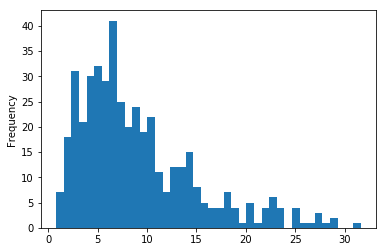

In [145]:
df_2016['PTS'].plot.hist(bins=40)

In [146]:
z,pval = stats.normaltest(df_2016['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2016['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2016['PTS'])
stat, kpval = kstest(df_2016['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2016['PTS'])
stat, kpval = kstest(df_2016['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

90.2989039108 2.46514321324e-20
PTS Is not from a Normal Dist
0.0346984793549 0.674314181796
PTS Is likley from a Gamma Dist
0.0282566841854 0.872045330019
PTS Is likley from a Log norm Dist


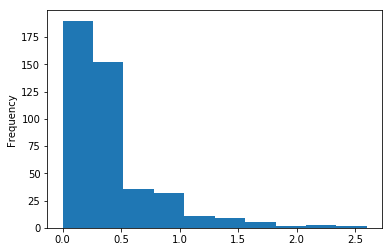

In [147]:
df_2016['BLK'].plot.hist(bins=10)

In [148]:
z,pval = stats.normaltest(df_2016['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2016['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2016['BLK'])
stat, kpval = kstest(df_2016['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2016['BLK'])
stat, kpval = kstest(df_2016['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2016['BLK'])
stat, kpval = kstest(df_2016['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2016['BLK'])
stat, kpval = kstest(df_2016['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')

213.238087925 4.96520908507e-47
BLK Is not from a Normal Dist
0.148816868543 5.21492893313e-09
BLK Is not from a Exponen Dist
0.202151301364 2.22044604925e-16
BLK Is not from a Gamma Dist
0.104821239109 0.000110682621423
BLK Is not from a Log norm Dist
0.190645355492 1.53210777398e-14
BLK Is not from a Chisq Dist


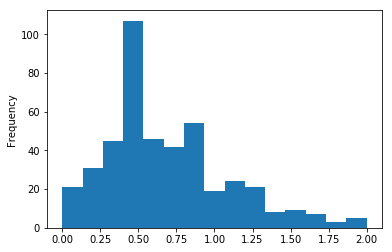

In [149]:
df_2016['STL'].plot.hist(bins=15)

In [150]:
z,pval = stats.normaltest(df_2016['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2016['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2016['STL'])
stat, kpval = kstest(df_2016['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2016['STL'])
stat, kpval = kstest(df_2016['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2016['STL'])
stat, kpval = kstest(df_2016['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

54.1725795147 1.72414514335e-12
STL Is not from a Normal Dist
0.0699172181503 0.0252883094783
STL Is not from a Gamma Dist
0.243820103103 0.0
STL Is not from a Exponen Dist
0.0692077968026 0.0276109035404
STL Is not from a Log norm Dist


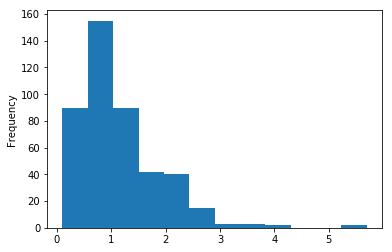

In [151]:
df_2016['TOV'].plot.hist(bins=12)

In [152]:
z,pval = stats.normaltest(df_2016['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2016['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2016['TOV'])
stat, kpval = kstest(df_2016['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2016['TOV'])
stat, kpval = kstest(df_2016['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

173.245398332 2.40015751772e-38
TOV Is not from a Normal Dist
0.0647812924991 0.0468177683227
TOV Is not from a Gamma Dist
0.0514658167681 0.185841429712
TOV Is likley from a Log norm Dist


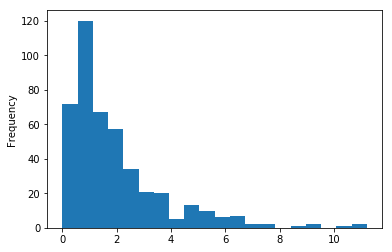

In [153]:
df_2016['AST'].plot.hist(bins=20)

In [154]:
z,pval = stats.normaltest(df_2016['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2016['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2016['AST'])
stat, kpval = kstest(df_2016['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2016['AST'])
stat, kpval = kstest(df_2016['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

197.518712181 1.28634248509e-43
AST Is not from a Normal Dist
0.0703883040138 0.0238432027262
AST Is not from a Gamma Dist
0.0390785387156 0.50526385882
AST Is likley from a Log norm Dist


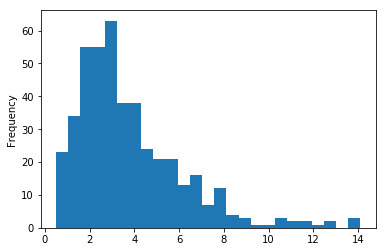

In [155]:
df_2016['REB'].plot.hist(bins=25)

In [156]:
z,pval = stats.normaltest(df_2016['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2016['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2016['REB'])
stat, kpval = kstest(df_2016['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2016['REB'])
stat, kpval = kstest(df_2016['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

131.091116365 3.41920994601e-29
REB Is not from a Normal Dist
0.0400877629089 0.470485393014
REB Is likley from a Gamma Dist
0.0288411395533 0.855764194973
REB Is likley from a Log norm Dist


# Data Visualization and Analysis




In [157]:
#list of players stats datafromes
lst_players_df = []
#over range 0-16 read csv into list
for i in range(17):
    if i < 10:
        lst_players_df.append(pd.read_csv('clean_players_200'+str(i)+'.csv'))
    else:
        lst_players_df.append(pd.read_csv('clean_players_20'+str(i)+'.csv'))

In [158]:
for df in lst_players_df: #for each df in list
    #Each show to be likley from a LOGNORM distribution
    #So we are converting each value to its log value to normalize the 
    #distribution so that we can use the z-score test for impact calculation
    #getting rid of 0's replacing with 1/minplayed ((1/game)/(min/game)) 
    df['PTS'].replace(0, 1/df['MIN'], inplace = True)
    df['AST'].replace(0, 1/df['MIN'], inplace = True)
    df['TOV'].replace(0, 1/df['MIN'], inplace = True)
    df['REB'].replace(0, 1/df['MIN'], inplace = True)
    df['STL'].replace(0, 1/df['MIN'], inplace = True)
    df['BLK'].replace(0, 1/df['MIN'], inplace = True)
    df['LOGPTS'] = np.log(df['PTS'])
    df['LOGAST'] = np.log(df['AST'])
    df['LOGTOV'] = np.log(df['TOV'])
    df['LOGREB'] = np.log(df['REB'])
    df['LOGSTL'] = np.log(df['STL'])
    df['LOGBLK'] = np.log(df['BLK'])

In [159]:
#list of average points/pergame for each season
lst_yearly_logpts_avg = []
#list of points/pergame standard deviation for each season
lst_yearly_logpts_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logpts_avg.append(np.mean(df['LOGPTS']))#calculate avg points and append into list of avgs
    lst_yearly_logpts_stddev.append(np.std(df['LOGPTS']))#calculate stddev of points and append into list of stddevs


#list of average assist/pergame for each season
lst_yearly_logast_avg = [] 
#list of assist/pergame standard deviation for each season
lst_yearly_logast_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logast_avg.append(np.mean(df['LOGAST']))#calculate avg assist and append into list of avgs
    lst_yearly_logast_stddev.append(np.std(df['LOGAST']))#calculate stddev of assist and append into list of stddevs

#list of average turnover/pergame for each season
lst_yearly_logtov_avg = [] 
#list of turnover/pergame standard deviation for each season
lst_yearly_logtov_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logtov_avg.append(np.mean(df['LOGTOV']))#calculate avg turnover and append into list of avgs
    lst_yearly_logtov_stddev.append(np.std(df['LOGTOV']))#calculate stddev of turnover and append into list of stddevs

#list of average rebound/pergame for each season
lst_yearly_logreb_avg = [] 
#list of rebound/pergame standard deviation for each season
lst_yearly_logreb_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logreb_avg.append(np.mean(df['LOGREB']))#calculate avg rebound and append into list of avgs
    lst_yearly_logreb_stddev.append(np.std(df['LOGREB']))#calculate stddev of rebound and append into list of stddevs

#list of average steal/pergame for each season
lst_yearly_logstl_avg = [] 
#list of steal/pergame standard deviation for each season
lst_yearly_logstl_stddev = []
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logstl_avg.append(np.mean(df['LOGSTL']))#calculate avg steal and append into list of avgs
    lst_yearly_logstl_stddev.append(np.std(df['LOGSTL']))#calculate stddev of steal and append into list of stddevs

#list of average block/pergame for each season
lst_yearly_logblk_avg = [] 
#list of block/pergame standard deviation for each season
lst_yearly_logblk_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logblk_avg.append(np.mean(df['LOGBLK']))#calculate avg block and append into list of avgs
    lst_yearly_logblk_stddev.append(np.std(df['LOGBLK']))#calculate stddev of block and append into list of stddevs
    

In [160]:
#setting arbitraly weights valued based on consensus of how much each stat was worth in points
f_pts_weight = 1.0 #1 point is worth 1 points
f_reb_weight = 1.2 #rebounds don't necessarily lead to a score but give more oppotunities for them so estimated by 2.3 * .55(hish est fg%)
f_blk_weight = 2.3 #denial of a shot 2-3, twos are more common than threes so that is why it is 2.3 instead of 2.5
f_stl_weight = 1.8 #worth more than rebound due to likleyhood of fastbreak
f_ast_weight = 2.3 #always leads to a score so opposite of block
f_tov_weight = -1.8 #basically opposite of steal

In [161]:
#calculating impact
index = 0
    
for df in lst_players_df:
    impact_val = []
    for i, row in df.iterrows():
        #calculate z-score of normalized distribution
        pts_zval = (row['LOGPTS']-lst_yearly_logpts_avg[index])/lst_yearly_logpts_stddev[index]
        ast_zval = (row['LOGAST']-lst_yearly_logast_avg[index])/lst_yearly_logast_stddev[index]
        reb_zval = (row['LOGREB']-lst_yearly_logreb_avg[index])/lst_yearly_logreb_stddev[index]
        blk_zval = (row['LOGBLK']-lst_yearly_logblk_avg[index])/lst_yearly_logblk_stddev[index]
        stl_zval = (row['LOGSTL']-lst_yearly_logstl_avg[index])/lst_yearly_logstl_stddev[index]
        tov_zval = (row['LOGTOV']-lst_yearly_logtov_avg[index])/lst_yearly_logtov_stddev[index]
        impact_val.append((row['LOGPTS']*f_pts_weight*math.e**(pts_zval/2)) +\
                          (row['LOGAST']*f_ast_weight*math.e**(ast_zval/2)) +\
                          (row['LOGREB']*f_reb_weight*math.e**(reb_zval/2)) +\
                          (row['LOGBLK']*f_blk_weight*math.e**(blk_zval/2)) +\
                          (row['LOGSTL']*f_stl_weight*math.e**(stl_zval/2)) +\
                          (row['LOGTOV']*f_tov_weight*math.e**(tov_zval/2)))
    df["IMPACT"] = impact_val
    index += 1

0      -0.953317
1       6.944188
2       2.250186
3       6.530354
4       4.024322
5       4.270271
6      -0.573403
7       4.714069
8      16.269523
9      12.850660
10     -3.878851
11     -4.156092
12     11.128466
13     -4.250886
14     18.677734
15     10.679489
16     -2.734149
17      7.944575
18     -1.164696
19      7.953219
20      5.044428
21     -1.240455
22      9.191327
23      2.529415
24     14.716240
25      3.247497
26     10.219007
27      5.347970
28     -3.045697
29     -1.302799
         ...    
381     6.350287
382    -4.341277
383    -1.757746
384     3.540196
385     2.431887
386    -0.693209
387     4.623076
388     2.247171
389     3.356020
390     3.152712
391    -3.446483
392     3.525674
393    13.864701
394    -1.531110
395    12.744611
396     1.334061
397    -0.669878
398    -3.058553
399     2.677432
400     6.824476
401     0.778473
402    -2.446698
403    -2.513262
404     7.125548
405    -1.445071
406    -2.864546
407    -3.970449
408     1.4281

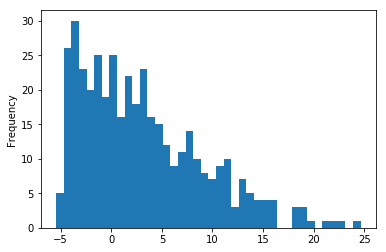

In [162]:
print(lst_players_df[1]['IMPACT'])
lst_players_df[1]['IMPACT'].plot.hist(bins = 40)

In [163]:
#create list each item is a dictionary for each season that contains each teams players individual impact values
lst_season_team_player_impacts = []
#for each df_season in lst_player_df
for df_season in lst_players_df:
    #create dictionary ['TEAM_ID'] = list of impact values of players on team
    team_impacts_dict = dict()
    #for each player in df_season
    for i, row in df_season.iterrows():
        #grab players team ID
        key = row['TEAM_ID']
        #check if ID is not a key in the dict
        if key not in team_impacts_dict:
            #then create key in dict
            team_impacts_dict[key] = []
        #append value into key array
        team_impacts_dict[key].append(row['IMPACT'])
    #append dict into list
    lst_season_team_player_impacts.append(team_impacts_dict)

In [164]:
#create list each item is a dict for each season that contains impact mean and stddev
lst_season_team_impact_meanstddev = []
#for each dictionary in lst_season_team_player
for season_dict in lst_season_team_player_impacts:
    #create df to hold TEAM_ID, IMP_MEAN, IMP_STD
    df_team_impact_stats = pd.DataFrame()
    lst_team_id = []
    lst_imp_mean = []
    lst_imp_stddev =[]
    #for each key in team players impacts dictionary
    for key, values in season_dict.items(): #populate lists
        lst_team_id.append(key)
        lst_imp_mean.append(np.mean(values))
        lst_imp_stddev.append(np.std(values))
    #fill df
    df_team_impact_stats['TEAM_ID'] = lst_team_id
    df_team_impact_stats['IMP_MEAN'] = lst_imp_mean
    df_team_impact_stats['IMP_STD'] = lst_imp_stddev
    #append df into list
    lst_season_team_impact_meanstddev.append(df_team_impact_stats)

0     2.679691
1     2.295261
2     4.516480
3     2.724042
4     3.432748
5     2.274397
6     2.374848
7     1.751362
8     2.459293
9     4.383524
10    2.126196
11    3.133415
12    4.093001
13    3.809379
14    2.656002
15    4.454801
16    3.617052
17    1.959801
18    3.996218
19    3.495920
20    3.517127
21    2.701743
22    2.650901
23    2.920672
24    4.082740
25    2.751035
26    3.915756
27    1.337545
28    3.454460
Name: IMP_MEAN, dtype: float64


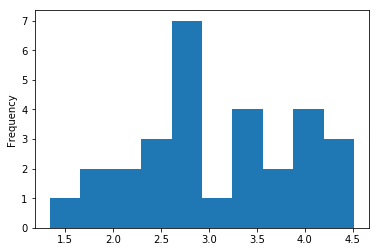

In [165]:
print(lst_season_team_impact_meanstddev[0]['IMP_MEAN'])
lst_season_team_impact_meanstddev[0]['IMP_MEAN'].plot.hist()

0     5.559697
1     5.591808
2     7.288375
3     4.897315
4     5.672289
5     5.641749
6     6.245445
7     4.298780
8     6.195844
9     6.737841
10    4.532157
11    7.109228
12    6.732642
13    7.682105
14    7.281559
15    5.359979
16    6.741422
17    5.903186
18    7.486802
19    5.697869
20    8.086799
21    4.696127
22    4.946825
23    6.116150
24    6.575004
25    5.475303
26    7.156718
27    2.866839
28    5.258141
Name: IMP_STD, dtype: float64


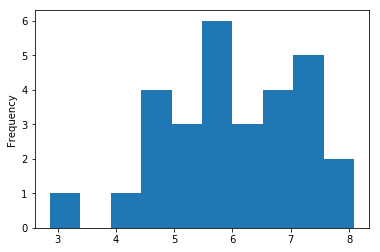

In [166]:
print(lst_season_team_impact_meanstddev[0]['IMP_STD'])
lst_season_team_impact_meanstddev[0]['IMP_STD'].plot.hist()

In [167]:
for df in lst_season_team_impact_meanstddev:
    print(df.shape)

(29, 3)
(29, 3)
(29, 3)
(29, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)


In [168]:
lst_ranked_teams_df = []
#over range 0-16 read csv into list
for i in range(17):
    if i < 10:
        lst_ranked_teams_df.append(pd.read_csv('ranked_teams_200'+str(i)+'.csv'))
    else:
        lst_ranked_teams_df.append(pd.read_csv('ranked_teams_20'+str(i)+'.csv'))
        
print(lst_ranked_teams_df[0])

    Unnamed: 0     TEAM_ID               TEAM_NAME  GP   W   L  W_PCT   MIN  \
0            0  1610612759       San Antonio Spurs  82  58  24  0.707  48.4   
1            0  1610612755      Philadelphia 76ers  82  56  26  0.683  48.4   
2            0  1610612747      Los Angeles Lakers  82  56  26  0.683  48.5   
3            0  1610612758        Sacramento Kings  82  55  27  0.671  49.0   
4            0  1610612762               Utah Jazz  82  53  29  0.646  48.2   
5            0  1610612742        Dallas Mavericks  82  53  29  0.646  48.3   
6            0  1610612749         Milwaukee Bucks  82  52  30  0.634  48.2   
7            0  1610612756            Phoenix Suns  82  51  31  0.622  48.3   
8            0  1610612748              Miami Heat  82  50  32  0.610  48.5   
9            0  1610612757  Portland Trail Blazers  82  50  32  0.610  48.2   
10           0  1610612752         New York Knicks  82  48  34  0.585  48.5   
11           0  1610612750  Minnesota Timberwolves  

In [169]:
lst_ranked_team_impact_df =[]
for index in range(len(lst_season_team_impact_meanstddev)):
    lst_ranked_team_impact_df.append(pd.merge(lst_ranked_teams_df[index], lst_season_team_impact_meanstddev[index], on= ['TEAM_ID']))

print(lst_ranked_team_impact_df[0])

    Unnamed: 0     TEAM_ID               TEAM_NAME  GP   W   L  W_PCT   MIN  \
0            0  1610612759       San Antonio Spurs  82  58  24  0.707  48.4   
1            0  1610612755      Philadelphia 76ers  82  56  26  0.683  48.4   
2            0  1610612747      Los Angeles Lakers  82  56  26  0.683  48.5   
3            0  1610612758        Sacramento Kings  82  55  27  0.671  49.0   
4            0  1610612762               Utah Jazz  82  53  29  0.646  48.2   
5            0  1610612742        Dallas Mavericks  82  53  29  0.646  48.3   
6            0  1610612749         Milwaukee Bucks  82  52  30  0.634  48.2   
7            0  1610612756            Phoenix Suns  82  51  31  0.622  48.3   
8            0  1610612748              Miami Heat  82  50  32  0.610  48.5   
9            0  1610612757  Portland Trail Blazers  82  50  32  0.610  48.2   
10           0  1610612752         New York Knicks  82  48  34  0.585  48.5   
11           0  1610612750  Minnesota Timberwolves  

/Users/Kevin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'Impact Standard Deviation')

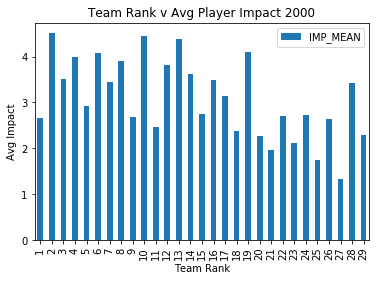

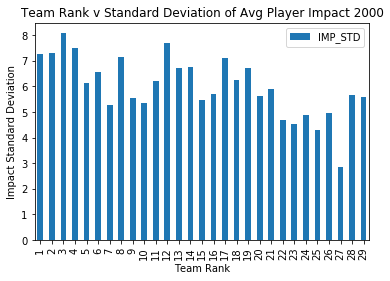

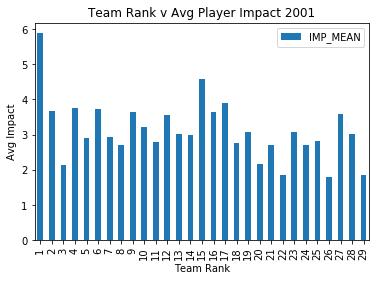

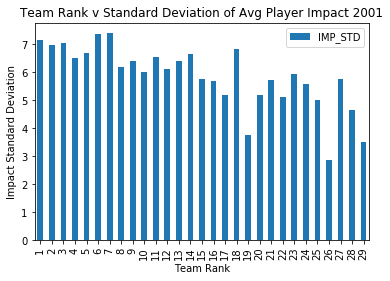

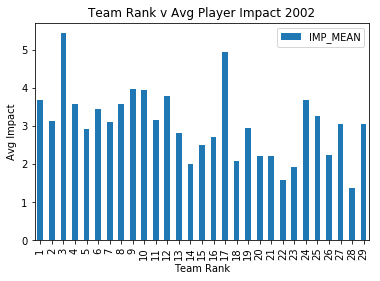

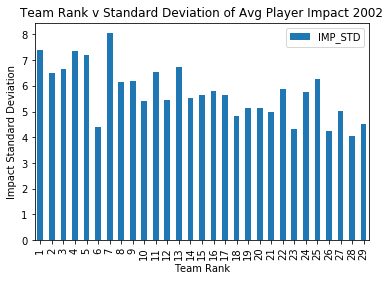

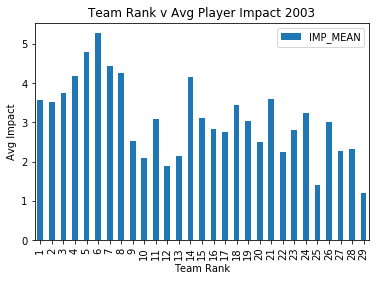

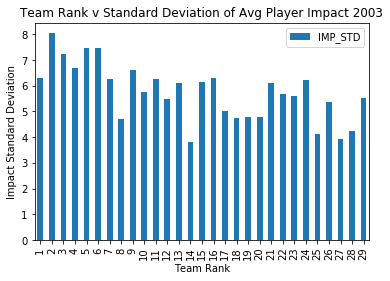

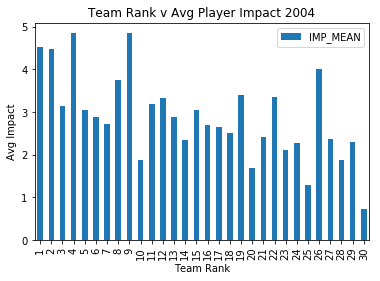

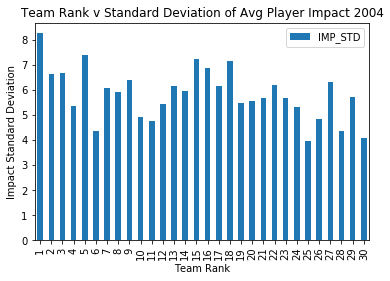

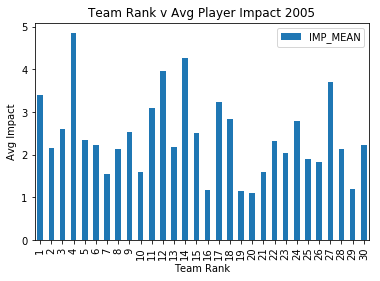

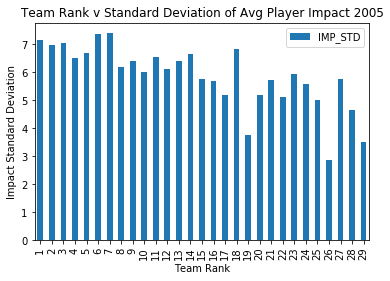

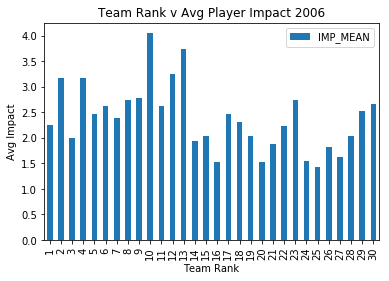

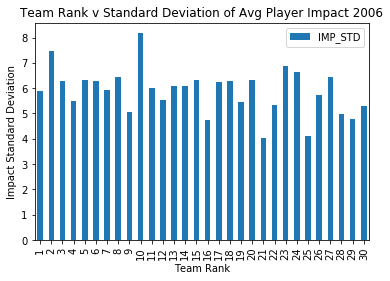

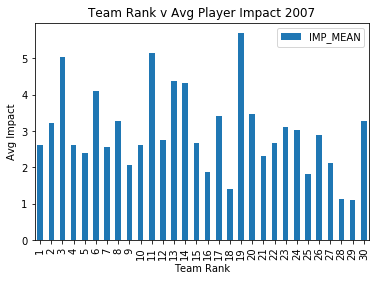

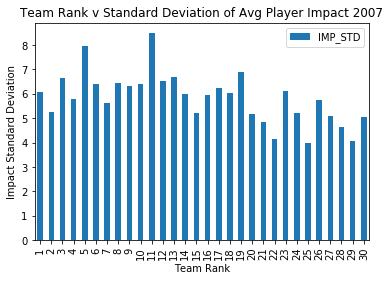

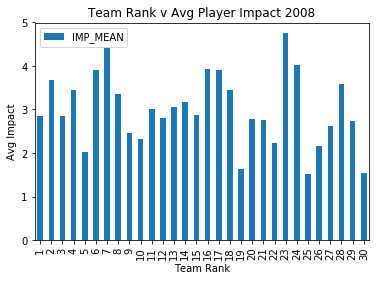

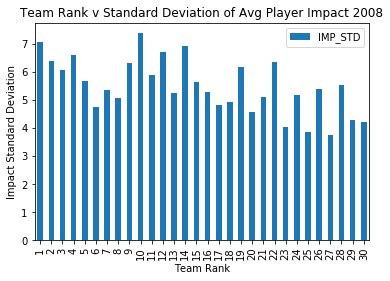

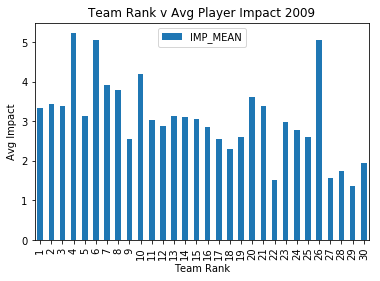

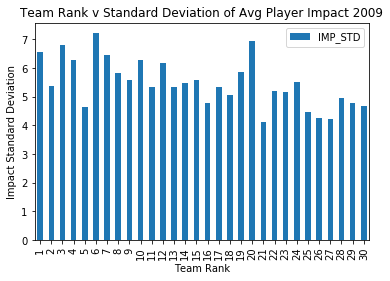

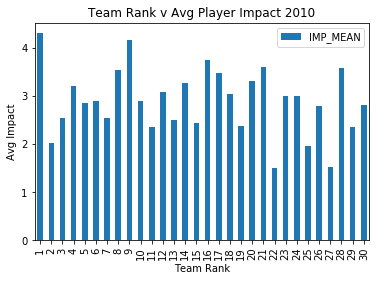

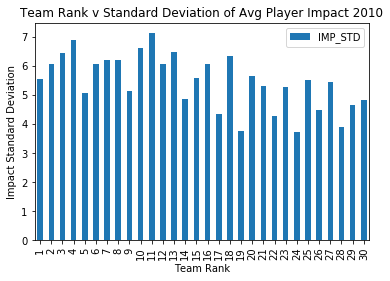

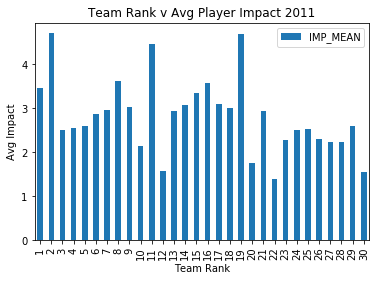

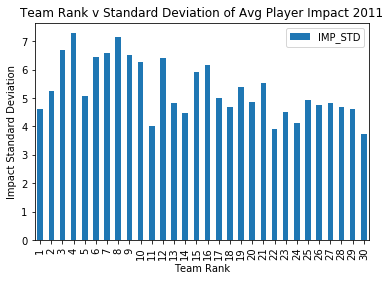

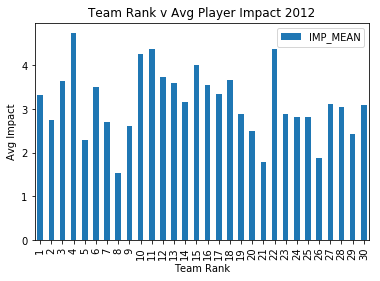

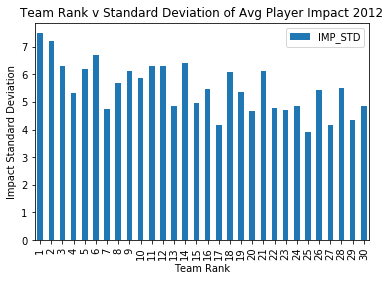

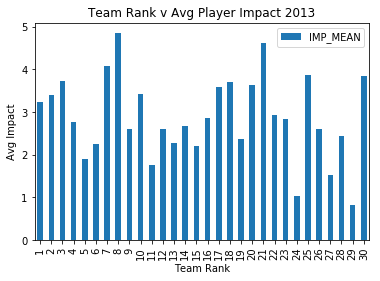

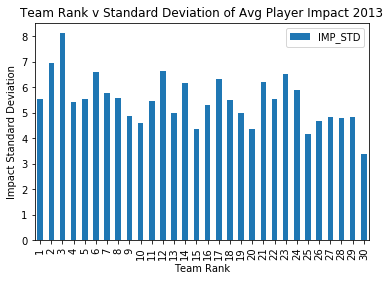

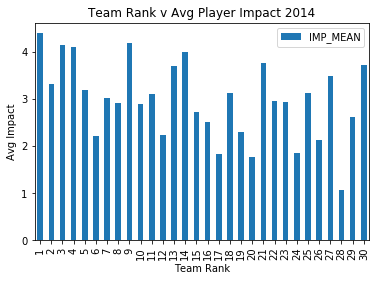

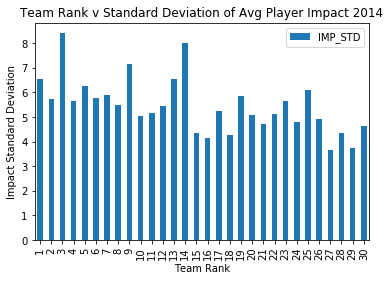

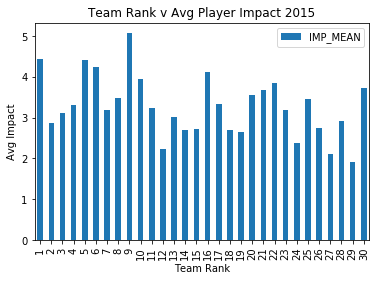

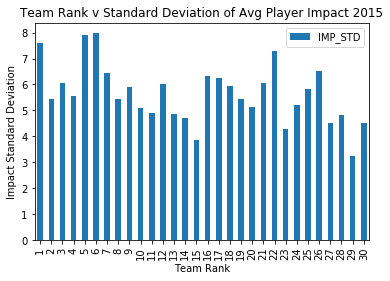

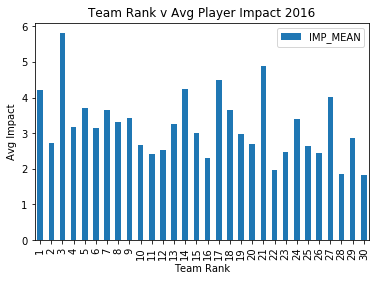

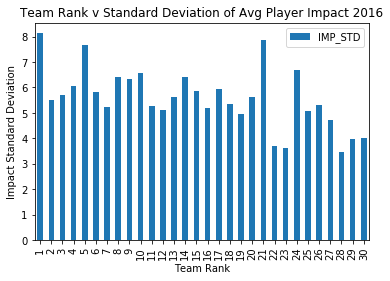

In [170]:
#Visualization for 2000
customers = lst_ranked_team_impact_df[0][['CFPARAMS','IMP_MEAN']]
#customers.set_index('CFPARAMS')
customers.index = range(1,len(customers)+1)
my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2000")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")
deviation_graph = lst_ranked_team_impact_df[0][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)
deviation_graph.set_index('CFPARAMS')
my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2000")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2001
customers = lst_ranked_team_impact_df[1][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)
my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2001")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[1][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)
my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2001")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2002
customers = lst_ranked_team_impact_df[2][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)
my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2002")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[2][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)
my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2002")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2003
customers = lst_ranked_team_impact_df[3][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)
my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2003")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[3][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)
my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2003")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2004
customers = lst_ranked_team_impact_df[4][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)
my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2004")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[4][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2004")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2005
customers = lst_ranked_team_impact_df[5][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2005")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[1][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2005")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")


#Visualization for 2006
customers = lst_ranked_team_impact_df[6][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2006")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[6][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2006")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2007
customers = lst_ranked_team_impact_df[7][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2007")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[7][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2007")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2008
customers = lst_ranked_team_impact_df[8][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2008")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[8][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2008")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2009
customers = lst_ranked_team_impact_df[9][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2009")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[9][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2009")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2010
customers = lst_ranked_team_impact_df[10][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2010")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[10][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2010")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2011
customers = lst_ranked_team_impact_df[11][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2011")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[11][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2011")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2012
customers = lst_ranked_team_impact_df[12][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2012")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[12][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2012")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2013
customers = lst_ranked_team_impact_df[13][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2013")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[13][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2013")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2014
customers = lst_ranked_team_impact_df[14][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2014")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[14][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2014")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2015
customers = lst_ranked_team_impact_df[15][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2015")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[15][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2015")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

#Visualization for 2016

customers = lst_ranked_team_impact_df[16][['CFPARAMS','IMP_MEAN']]
customers.index = range(1,len(customers)+1)

my_plot = customers.plot(kind='bar', title="Team Rank v Avg Player Impact 2016")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

deviation_graph = lst_ranked_team_impact_df[16][['CFPARAMS','IMP_STD']]
deviation_graph.index = range(1,len(deviation_graph)+1)

my_plot = deviation_graph.plot(kind='bar', title="Team Rank v Standard Deviation of Avg Player Impact 2016")
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")

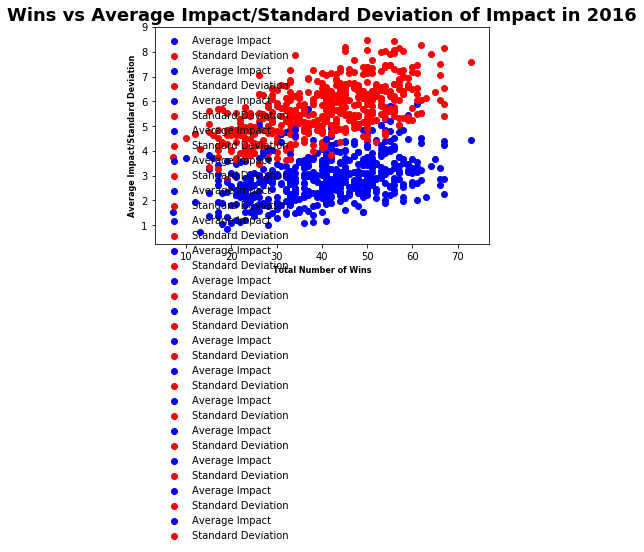

In [171]:
# Visualization for 2000

plt.scatter(lst_ranked_team_impact_df[0]['W'], lst_ranked_team_impact_df[0]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[0]['W'], lst_ranked_team_impact_df[0]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2000', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2001

plt.scatter(lst_ranked_team_impact_df[1]['W'], lst_ranked_team_impact_df[1]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[1]['W'], lst_ranked_team_impact_df[1]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2001', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2002

plt.scatter(lst_ranked_team_impact_df[2]['W'], lst_ranked_team_impact_df[2]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[2]['W'], lst_ranked_team_impact_df[2]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2002', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2003

plt.scatter(lst_ranked_team_impact_df[3]['W'], lst_ranked_team_impact_df[3]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[3]['W'], lst_ranked_team_impact_df[3]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2003', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2004

plt.scatter(lst_ranked_team_impact_df[4]['W'], lst_ranked_team_impact_df[4]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[4]['W'], lst_ranked_team_impact_df[4]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2004', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2005

plt.scatter(lst_ranked_team_impact_df[5]['W'], lst_ranked_team_impact_df[5]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[5]['W'], lst_ranked_team_impact_df[5]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2005', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2006

plt.scatter(lst_ranked_team_impact_df[6]['W'], lst_ranked_team_impact_df[6]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[6]['W'], lst_ranked_team_impact_df[6]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2006', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2007

plt.scatter(lst_ranked_team_impact_df[7]['W'], lst_ranked_team_impact_df[7]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[7]['W'], lst_ranked_team_impact_df[7]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2007', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2008

plt.scatter(lst_ranked_team_impact_df[8]['W'], lst_ranked_team_impact_df[8]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[8]['W'], lst_ranked_team_impact_df[8]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2008', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2009

plt.scatter(lst_ranked_team_impact_df[9]['W'], lst_ranked_team_impact_df[9]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[9]['W'], lst_ranked_team_impact_df[9]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2009', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2010

plt.scatter(lst_ranked_team_impact_df[10]['W'], lst_ranked_team_impact_df[10]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[10]['W'], lst_ranked_team_impact_df[10]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2010', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2011

plt.scatter(lst_ranked_team_impact_df[11]['W'], lst_ranked_team_impact_df[11]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[11]['W'], lst_ranked_team_impact_df[11]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2011', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2012

plt.scatter(lst_ranked_team_impact_df[12]['W'], lst_ranked_team_impact_df[12]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[12]['W'], lst_ranked_team_impact_df[12]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2012', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2013

plt.scatter(lst_ranked_team_impact_df[13]['W'], lst_ranked_team_impact_df[13]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[13]['W'], lst_ranked_team_impact_df[13]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2013', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2014

plt.scatter(lst_ranked_team_impact_df[14]['W'], lst_ranked_team_impact_df[14]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[14]['W'], lst_ranked_team_impact_df[14]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2014', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2015

plt.scatter(lst_ranked_team_impact_df[15]['W'], lst_ranked_team_impact_df[15]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[15]['W'], lst_ranked_team_impact_df[15]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2015', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


# Visualization for 2016

plt.scatter(lst_ranked_team_impact_df[16]['W'], lst_ranked_team_impact_df[16]["IMP_MEAN"], c = 'blue', label = 'Average Impact')
plt.hold
plt.scatter(lst_ranked_team_impact_df[16]['W'], lst_ranked_team_impact_df[16]["IMP_STD"], c = 'red', label = 'Standard Deviation')

plt.title('Wins vs Average Impact/Standard Deviation of Impact in 2016', fontsize=18, fontweight='bold')

plt.xlabel('Total Number of Wins', fontsize=8, fontweight='bold')
plt.ylabel('Average Impact/Standard Deviation', fontsize=8, fontweight='bold')

plt.legend(loc='upper left', scatterpoints=1, frameon=False)


In [172]:
# Pearson correlation coefficients for average impact for each year

rm0 = pearsonr(lst_ranked_team_impact_df[0]['W'], lst_ranked_team_impact_df[0]["IMP_MEAN"])
rm1 = pearsonr(lst_ranked_team_impact_df[1]['W'], lst_ranked_team_impact_df[1]["IMP_MEAN"])
rm2 = pearsonr(lst_ranked_team_impact_df[2]['W'], lst_ranked_team_impact_df[2]["IMP_MEAN"])
rm3 = pearsonr(lst_ranked_team_impact_df[3]['W'], lst_ranked_team_impact_df[3]["IMP_MEAN"])
rm4 = pearsonr(lst_ranked_team_impact_df[4]['W'], lst_ranked_team_impact_df[4]["IMP_MEAN"])
rm5 = pearsonr(lst_ranked_team_impact_df[5]['W'], lst_ranked_team_impact_df[5]["IMP_MEAN"])
rm6 = pearsonr(lst_ranked_team_impact_df[6]['W'], lst_ranked_team_impact_df[6]["IMP_MEAN"])
rm7 = pearsonr(lst_ranked_team_impact_df[7]['W'], lst_ranked_team_impact_df[7]["IMP_MEAN"])
rm8 = pearsonr(lst_ranked_team_impact_df[8]['W'], lst_ranked_team_impact_df[8]["IMP_MEAN"])
rm9 = pearsonr(lst_ranked_team_impact_df[9]['W'], lst_ranked_team_impact_df[9]["IMP_MEAN"])
rm10 = pearsonr(lst_ranked_team_impact_df[10]['W'], lst_ranked_team_impact_df[10]["IMP_MEAN"])
rm11 = pearsonr(lst_ranked_team_impact_df[11]['W'], lst_ranked_team_impact_df[11]["IMP_MEAN"])
rm12 = pearsonr(lst_ranked_team_impact_df[12]['W'], lst_ranked_team_impact_df[12]["IMP_MEAN"])
rm13 = pearsonr(lst_ranked_team_impact_df[13]['W'], lst_ranked_team_impact_df[13]["IMP_MEAN"])
rm14 = pearsonr(lst_ranked_team_impact_df[14]['W'], lst_ranked_team_impact_df[14]["IMP_MEAN"])
rm15 = pearsonr(lst_ranked_team_impact_df[15]['W'], lst_ranked_team_impact_df[15]["IMP_MEAN"])
rm16 = pearsonr(lst_ranked_team_impact_df[16]['W'], lst_ranked_team_impact_df[16]["IMP_MEAN"])

# Average pearson correlation coefficient for average impact for each year

a = rm0[0] + rm1[0] + rm2[0] + rm3[0] + rm4[0] + rm5[0] + rm6[0] + rm7[0] + rm8[0] + rm9[0] + rm10[0] + rm11[0] + rm12[0] + rm13[0] + rm14[0] + rm15[0] + rm16[0]
avg_mean_r = (a)/(17)



# Pearson correlation coefficients for standard deviation of impact for each year

rs0 = pearsonr(lst_ranked_team_impact_df[0]['W'], lst_ranked_team_impact_df[0]["IMP_STD"])
rs1 = pearsonr(lst_ranked_team_impact_df[1]['W'], lst_ranked_team_impact_df[1]["IMP_STD"])
rs2 = pearsonr(lst_ranked_team_impact_df[2]['W'], lst_ranked_team_impact_df[2]["IMP_STD"])
rs3 = pearsonr(lst_ranked_team_impact_df[3]['W'], lst_ranked_team_impact_df[3]["IMP_STD"])
rs4 = pearsonr(lst_ranked_team_impact_df[4]['W'], lst_ranked_team_impact_df[4]["IMP_STD"])
rs5 = pearsonr(lst_ranked_team_impact_df[5]['W'], lst_ranked_team_impact_df[5]["IMP_STD"])
rs6 = pearsonr(lst_ranked_team_impact_df[6]['W'], lst_ranked_team_impact_df[6]["IMP_STD"])
rs7 = pearsonr(lst_ranked_team_impact_df[7]['W'], lst_ranked_team_impact_df[7]["IMP_STD"])
rs8 = pearsonr(lst_ranked_team_impact_df[8]['W'], lst_ranked_team_impact_df[8]["IMP_STD"])
rs9 = pearsonr(lst_ranked_team_impact_df[9]['W'], lst_ranked_team_impact_df[9]["IMP_STD"])
rs10 = pearsonr(lst_ranked_team_impact_df[10]['W'], lst_ranked_team_impact_df[10]["IMP_STD"])
rs11 = pearsonr(lst_ranked_team_impact_df[11]['W'], lst_ranked_team_impact_df[11]["IMP_STD"])
rs12 = pearsonr(lst_ranked_team_impact_df[12]['W'], lst_ranked_team_impact_df[12]["IMP_STD"])
rs13 = pearsonr(lst_ranked_team_impact_df[13]['W'], lst_ranked_team_impact_df[13]["IMP_STD"])
rs14 = pearsonr(lst_ranked_team_impact_df[14]['W'], lst_ranked_team_impact_df[14]["IMP_STD"])
rs15 = pearsonr(lst_ranked_team_impact_df[15]['W'], lst_ranked_team_impact_df[15]["IMP_STD"])
rs16 = pearsonr(lst_ranked_team_impact_df[16]['W'], lst_ranked_team_impact_df[16]["IMP_STD"])

# Average pearson correlation coefficient for standard deviation of impact for each year

b = rs0[0] + rs1[0] + rs2[0] + rs3[0] + rs4[0] + rs5[0] + rs6[0] + rs7[0] + rs8[0] + rs9[0] + rs10[0] + rs11[0] + rs12[0] + rs13[0] + rs14[0] + rs15[0] + rs16[0]
avg_std_r = (b)/(17)

print(avg_mean_r)
print(avg_std_r)

0.417063414287
0.599756592385


# Data Analysis and Results



# Conclusion and Discussion

